# **An intensive analysis of consumer behavioral, applying techniques ranging from supervised, unsupervised learning, as well as semi-supervised learning.**

In [2]:

## If on Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# !pip install lime


# Data

The data is in `dat/online_shoppers_intention.csv.gz`, from [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

- The dataset consists of 10 numerical and 8 categorical variables.
- Variable `Revenue` is the target label. This binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase; in other words `Revenue` is False.
- `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g, moving from one page to another. 
- Features `Bounce Rate`, `Exit Rate` and `Page Value` represent  metrics measured by Google Analytics for each page in the e-commerce site. 
- The value of `Bounce Rate` for a web page refers to the percentage of visitors who enter the site from that page and then leave (i.e., bounce) without triggering any other requests to the analytics server during that session. 
- The value of `Exit Rate` for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- Feature `Page Value` represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- Feature `Special Day` indicates the closeness of the site visiting time to a specific special day (e.g., Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

# Tasks

## Task 1. Classification (50 points)

Build a predictive classification model using data entries corresponding to the months of **June—December as training set**, and those corresponding to **February—March as test set**. 

More specifically,

1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
1. Report and interpret the most meaningful classifications metrics
1. Show and explain the hyper-parameter fitting process.

Point breakdown:

- (10 points) Basic exploratory data analysis (EDA) 
    - Appropriate univariate descriptive statistics and figures
    - Appropriate bi-variate descriptive statistics and figures
- ( 5 points) Advanced EDA
    - Free-response, shows us what they know! 
- ( 5 points) Train/test split
- (10 points) Feature selection
- (15 points) Model fitting
- ( 5 points) Performance points 

In [3]:
# My personal preference is to have all the libraries at the top.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lime
import random
plt.style.use("seaborn")

from sklearn.preprocessing import MinMaxScaler, StandardScaler  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.utils import validation
from sklearn import feature_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA




from lime import lime_tabular
 
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

Also setting the random seed. The random seed is _always_ 42.

In [4]:
random_seed = 42
np.random.seed(random_seed)

### EDA and Train/Test Split

Reading in data and checking the head to see if there is a header row.

In [5]:
path_gc = '.' # '/content/drive/My Drive/Colab Notebooks/fourthbrain/midterm'
rawdata = pd.read_csv(path_gc+'/dat/online_shoppers_intention.csv.gz')
rawdata.head(5).transpose() 

,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0.0,0.0,0.0,0.0,0.0
Informational,0,0,0,0,0
Informational_Duration,0.0,0.0,0.0,0.0,0.0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0.0,64.0,0.0,2.666667,627.5
BounceRates,0.2,0.0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0.0,0.0,0.0,0.0,0.0
SpecialDay,0.0,0.0,0.0,0.0,0.0


Getting to know the data

In [6]:
rawdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [7]:
rawdata[rawdata['Revenue']==1].T.head()

,65,76,101,188,196,198,199,200,206,220,...,12234,12236,12252,12265,12267,12272,12276,12311,12312,12313
Administrative,3,10,4,9,2,0,3,1,1,2,...,0,12,0,6,0,6,7,1,7,3
Administrative_Duration,87.833333,1005.666667,61.0,111.5,56.0,0.0,94.0,32.0,18.0,38.0,...,0.0,219.274359,0.0,413.499612,0.0,133.466667,139.575,0.0,150.357143,16.0
Informational,0,0,0,1,1,0,2,0,0,0,...,0,4,0,0,0,0,0,2,1,3
Informational_Duration,0.0,0.0,0.0,48.5,144.0,0.0,125.0,0.0,0.0,0.0,...,0.0,857.166667,0.0,0.0,0.0,0.0,0.0,211.25,9.0,86.0
ProductRelated,27,36,19,49,67,17,55,50,16,14,...,36,107,24,83,5,44,30,144,221,15


In [8]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**Initial Observations**

The data contains 12330 entries as decribed in [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) and contains no null entries. The data will definitily need normalized and outliers examined and possibly stripped (for example Administrative_Duration has a mean of about 80, a standard deviation of about 176, and a maximum of about 3400 so the spread seems very uneven).



1. First, converting object and bool column data types to numbers

In [9]:
# Copying the data to make changes without changing the initial data.
data = pd.DataFrame.copy(rawdata, deep=True)

print('Weekend counts: ', rawdata['Weekend'].value_counts())
print('\nRevenue counts: ', rawdata['Revenue'].value_counts())

# reference https://statisticsglobe.com/convert-boolean-integer-pandas-dataframe-column-python
data['Weekend'] = data['Weekend'].astype(int) 
data['Revenue'] = data['Revenue'].astype(int)

print('\n\nWeekend counts: ', data['Weekend'].value_counts())
print('\nRevenue counts: ', data['Revenue'].value_counts(), '\n\n\n')

Weekend counts:  False    9462
True     2868
Name: Weekend, dtype: int64

Revenue counts:  False    10422
True      1908
Name: Revenue, dtype: int64


Weekend counts:  0    9462
1    2868
Name: Weekend, dtype: int64

Revenue counts:  0    10422
1     1908
Name: Revenue, dtype: int64 





Checking the information on the rest of the columns.

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Examining the number of variables and values in the other categorical columns.

In [11]:
cat_features = ['Administrative', 
                'Informational', 
                'Month' , 
                'ProductRelated', 
                'OperatingSystems', 
                'Browser', 
                'Region', 
                'TrafficType', 
                'VisitorType', 
                'Weekend']

for cf, num in zip(cat_features, range(1, len(cat_features))):
    value_dict = data[cf].value_counts().to_dict()
    print(f'\n\n  {num}. Unique values of: {cf}')
    for vc in value_dict:
        print('\t\t* ', vc, value_dict[vc])





  1. Unique values of: Administrative
		*  0 5768
		*  1 1354
		*  2 1114
		*  3 915
		*  4 765
		*  5 575
		*  6 432
		*  7 338
		*  8 287
		*  9 225
		*  10 153
		*  11 105
		*  12 86
		*  13 56
		*  14 44
		*  15 38
		*  16 24
		*  17 16
		*  18 12
		*  19 6
		*  24 4
		*  22 4
		*  23 3
		*  21 2
		*  20 2
		*  27 1
		*  26 1


  2. Unique values of: Informational
		*  0 9699
		*  1 1041
		*  2 728
		*  3 380
		*  4 222
		*  5 99
		*  6 78
		*  7 36
		*  9 15
		*  8 14
		*  10 7
		*  12 5
		*  14 2
		*  16 1
		*  11 1
		*  24 1
		*  13 1


  3. Unique values of: Month
		*  May 3364
		*  Nov 2998
		*  Mar 1907
		*  Dec 1727
		*  Oct 549
		*  Sep 448
		*  Aug 433
		*  Jul 432
		*  June 288
		*  Feb 184


  4. Unique values of: ProductRelated
		*  1 622
		*  2 465
		*  3 458
		*  4 404
		*  6 396
		*  7 391
		*  5 382
		*  8 370
		*  10 330
		*  9 317
		*  12 313
		*  11 308
		*  13 289
		*  15 270
		*  16 260
		*  14 251
		*  17 226
		*  20 225
		*  19 218
		*  22 213
		*  18 200
	

Unique values of the different categorical variables.
<details>
  <summary>Shown here.</summary>
  
  ##### Catergorical value counts.  



  1. Unique values of: Administrative
		*  0 5768
		*  1 1354
		*  2 1114
		*  3 915
		*  4 765
		*  5 575
		*  6 432
		*  7 338
		*  8 287
		*  9 225
		*  10 153
		*  11 105
		*  12 86
		*  13 56
		*  14 44
		*  15 38
		*  16 24
		*  17 16
		*  18 12
		*  19 6
		*  24 4
		*  22 4
		*  23 3
		*  21 2
		*  20 2
		*  27 1
		*  26 1


  2. Unique values of: Informational
		*  0 9699
		*  1 1041
		*  2 728
		*  3 380
		*  4 222
		*  5 99
		*  6 78
		*  7 36
		*  9 15
		*  8 14
		*  10 7
		*  12 5
		*  14 2
		*  16 1
		*  11 1
		*  24 1
		*  13 1


  3. Unique values of: Month
		*  May 3364
		*  Nov 2998
		*  Mar 1907
		*  Dec 1727
		*  Oct 549
		*  Sep 448
		*  Aug 433
		*  Jul 432
		*  June 288
		*  Feb 184


  4. Unique values of: ProductRelated
		*  1 622
		*  2 465
		*  3 458
		*  4 404
		*  6 396
		*  7 391
		*  5 382
		*  8 370
		*  10 330
		*  9 317
		*  12 313
		*  11 308
		*  13 289
		*  15 270
		*  16 260
		*  14 251
		*  17 226
		*  20 225
		*  19 218
		*  22 213
		*  18 200
		*  21 199
		*  24 192
		*  23 180
		*  27 177
		*  26 155
		*  25 154
		*  28 144
		*  30 142
		*  29 135
		*  31 128
		*  33 121
		*  32 119
		*  37 118
		*  36 110
		*  39 109
		*  34 103
		*  35 101
		*  38 89
		*  41 85
		*  42 77
		*  43 73
		*  40 71
		*  45 71
		*  44 69
		*  46 68
		*  50 64
		*  48 62
		*  53 60
		*  49 60
		*  47 56
		*  51 52
		*  52 50
		*  59 48
		*  57 47
		*  54 46
		*  62 46
		*  55 45
		*  56 44
		*  60 42
		*  58 41
		*  61 40
		*  63 39
		*  0 38
		*  66 38
		*  81 37
		*  64 36
		*  65 33
		*  71 33
		*  68 32
		*  79 31
		*  69 30
		*  67 30
		*  70 29
		*  85 28
		*  72 27
		*  74 25
		*  80 25
		*  77 24
		*  73 24
		*  82 23
		*  89 22
		*  83 21
		*  93 20
		*  84 20
		*  95 19
		*  98 19
		*  91 18
		*  94 18
		*  76 18
		*  90 17
		*  111 17
		*  75 17
		*  96 15
		*  97 15
		*  88 15
		*  87 15
		*  86 14
		*  106 14
		*  101 14
		*  107 13
		*  109 13
		*  131 13
		*  108 13
		*  122 12
		*  104 12
		*  113 12
		*  78 12
		*  114 12
		*  103 12
		*  115 11
		*  116 11
		*  137 11
		*  102 11
		*  154 11
		*  100 10
		*  92 10
		*  125 10
		*  118 10
		*  129 10
		*  130 10
		*  132 9
		*  99 9
		*  110 9
		*  120 9
		*  162 8
		*  133 8
		*  117 8
		*  141 8
		*  152 8
		*  171 7
		*  140 7
		*  128 7
		*  126 7
		*  127 7
		*  159 7
		*  112 7
		*  149 7
		*  124 7
		*  146 6
		*  105 6
		*  150 6
		*  145 6
		*  139 5
		*  151 5
		*  119 5
		*  157 5
		*  155 5
		*  134 5
		*  148 4
		*  176 4
		*  164 4
		*  213 4
		*  161 4
		*  167 4
		*  138 4
		*  179 4
		*  222 4
		*  123 4
		*  121 4
		*  143 4
		*  200 4
		*  156 4
		*  136 4
		*  135 4
		*  172 4
		*  142 3
		*  182 3
		*  221 3
		*  229 3
		*  202 3
		*  147 3
		*  227 3
		*  144 3
		*  230 3
		*  258 3
		*  187 3
		*  174 3
		*  160 3
		*  175 3
		*  237 3
		*  153 3
		*  170 3
		*  189 3
		*  193 3
		*  195 3
		*  178 3
		*  181 3
		*  186 3
		*  245 2
		*  439 2
		*  180 2
		*  264 2
		*  204 2
		*  173 2
		*  224 2
		*  401 2
		*  168 2
		*  220 2
		*  190 2
		*  219 2
		*  238 2
		*  188 2
		*  194 2
		*  184 2
		*  197 2
		*  231 2
		*  336 2
		*  280 2
		*  169 2
		*  310 2
		*  166 2
		*  199 2
		*  206 2
		*  337 2
		*  198 2
		*  216 2
		*  272 1
		*  324 1
		*  343 1
		*  423 1
		*  266 1
		*  349 1
		*  260 1
		*  226 1
		*  312 1
		*  338 1
		*  359 1
		*  163 1
		*  351 1
		*  362 1
		*  534 1
		*  470 1
		*  210 1
		*  183 1
		*  254 1
		*  378 1
		*  290 1
		*  261 1
		*  234 1
		*  281 1
		*  279 1
		*  248 1
		*  374 1
		*  283 1
		*  339 1
		*  315 1
		*  357 1
		*  247 1
		*  397 1
		*  330 1
		*  177 1
		*  233 1
		*  205 1
		*  304 1
		*  326 1
		*  218 1
		*  207 1
		*  286 1
		*  293 1
		*  318 1
		*  274 1
		*  191 1
		*  358 1
		*  255 1
		*  256 1
		*  518 1
		*  686 1
		*  429 1
		*  211 1
		*  313 1
		*  240 1
		*  346 1
		*  246 1
		*  486 1
		*  158 1
		*  377 1
		*  223 1
		*  305 1
		*  276 1
		*  291 1
		*  217 1
		*  705 1
		*  440 1
		*  282 1
		*  271 1
		*  275 1
		*  340 1
		*  501 1
		*  235 1
		*  309 1
		*  225 1
		*  517 1
		*  251 1
		*  232 1
		*  292 1
		*  385 1
		*  250 1
		*  311 1
		*  328 1
		*  584 1
		*  165 1
		*  287 1
		*  391 1
		*  449 1
		*  241 1
		*  243 1
		*  409 1
		*  262 1
		*  414 1
		*  192 1


  5. Unique values of: OperatingSystems
		*  2 6601
		*  1 2585
		*  3 2555
		*  4 478
		*  8 79
		*  6 19
		*  7 7
		*  5 6


  6. Unique values of: Browser
		*  2 7961
		*  1 2462
		*  4 736
		*  5 467
		*  6 174
		*  10 163
		*  8 135
		*  3 105
		*  13 61
		*  7 49
		*  12 10
		*  11 6
		*  9 1
  
</details>

Many subcatergories of the categorical features contain relatively few entries. It may be wise to reduce the number of features before one hot encoding and have these values will be replaced with a `< [cutoff value]` where the cutoff value will be determined for each variable manually. However, `Revenue = 1`, does not occur very often and instances may be lost.

Given this risk of data loss, this will only be performed on the test data set.

In [12]:
data.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [13]:
# df_test = data.copy()
# df_test.loc[df_test['Administrative'] > 11 , 'Administrative'] = '>11'
# print(f'Unique values of: Administrative: {df_test.Administrative.value_counts()}')

In [14]:
# df_test = data.copy()
# print(data['Informational'].head())
# df_test.loc[df_test['Informational'] > 5 , 'Informational'] = '>5'
# print(f'Unique values of: Informational: {df_test.Informational.value_counts()}')

In [15]:
# df_test = data.copy()
# print(df_test['OperatingSystems'].head())
# print(data['OperatingSystems'].head())
# df_test.loc[df_test['OperatingSystems'] > 4 , 'OperatingSystems'] = '>4'
# print(f'Unique values of: OperatingSystems: {df_test.OperatingSystems.value_counts()}')

In [16]:
# df_test = data.copy()
# print(df_test['Browser'].head())
# print(data['Browser'].head())
# df_test.loc[df_test['Browser'] > 11 , 'Browser'] = '>11'
# print(f'Unique values of: Browser: {df_test.Browser.value_counts()}')

One hot encoding VisitorType and other categorical variables (like `OperatingSystems` - thanks for pointing this out Asieh)


In [17]:
print(data.describe().T)
data_onehot = pd.get_dummies(data, columns = ['Administrative', 
                                                'Informational', 
                                                'ProductRelated', 
                                                'OperatingSystems', 
                                                'Browser', 
                                                'Region', 
                                                'TrafficType', 
                                                'VisitorType', 
                                                'Weekend'])
print(data_onehot.describe().transpose())

                           count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.

**`SpecialDay` is odd.**

In [18]:
data_onehot.groupby(['Month', 'SpecialDay'])\
        .agg(count = ('SpecialDay', 'count'))

count
Month SpecialDay       
Aug   0.0           433
Dec   0.0          1727
Feb   0.0           105
      0.2            15
      0.4            21
      0.6            19
      0.8            19
      1.0             5
Jul   0.0           432
June  0.0           288
Mar   0.0          1907
May   0.0          2192
      0.2           163
      0.4           222
      0.6           332
      0.8           306
      1.0           149
Nov   0.0          2998
Oct   0.0           549
Sep   0.0           448

**The `SpecialDay` variable is only non-zero in the months of `Feb` and `May`. The description of the data seemed to indicate that holidays throughout the year would be non-zero. It appears the examples given of Mother’s Day or Valentine's Day are <u>*the only*</u> `SpecialDay`'s indicated.**

**Dropping the `SpecialDay` column.**

In [19]:
data_onehot.drop(columns='SpecialDay', inplace = True)

It also looks like there is very small portion of `VisitorType_Other` that has different values based on the very small stadard deviation. I'm going to check the value count to see if dropping that column is possible.

In [20]:
data_onehot.groupby(['Month', 'VisitorType_Other'])\
        .agg(count = ('VisitorType_Other', 'count'))

count
Month VisitorType_Other       
Aug   0                    433
Dec   0                   1665
      1                     62
Feb   0                    184
Jul   0                    432
June  0                    287
      1                      1
Mar   0                   1907
May   0                   3364
Nov   0                   2976
      1                     22
Oct   0                    549
Sep   0                    448

In [21]:
data_onehot.groupby(['VisitorType_Other']).agg(count = ('VisitorType_Other', 'count'))

,count
VisitorType_Other,
0,12245
1,85


The above table confirm there is very small portion of `VisitorType_Other` that is not `1`, so the column does not provide useful values.


Dropping `VisitorType_Other`.

In [22]:
data_onehot.drop(columns='VisitorType_Other', inplace = True)

**Splitting off testing data, so as not to bias further EDA.**

February & March as test set.


In [23]:
test_set = data_onehot[(data_onehot['Month'] == 'Feb') | (data_onehot['Month'] == 'Mar')]
print(test_set.describe().transpose())

                                count        mean          std       min  \
Administrative_Duration        2091.0   66.448115   167.300840  0.000000   
Informational_Duration         2091.0   28.184538   115.613729  0.000000   
ProductRelated_Duration        2091.0  782.252683  1102.819418  0.000000   
BounceRates                    2091.0    0.023954     0.054888  0.000000   
ExitRates                      2091.0    0.047200     0.054111  0.000176   
...                               ...         ...          ...       ...   
TrafficType_20                 2091.0    0.000000     0.000000  0.000000   
VisitorType_New_Visitor        2091.0    0.111430     0.314739  0.000000   
VisitorType_Returning_Visitor  2091.0    0.888570     0.314739  0.000000   
Weekend_0                      2091.0    0.756576     0.429252  0.000000   
Weekend_1                      2091.0    0.243424     0.429252  0.000000   

                                      25%         50%          75%  \
Administrative_Du

June thru Dec as train set. (Remembr to remove **May** - thank you Sang for reminding me.)

In [24]:
train_set = data_onehot[~((data_onehot['Month'] == 'Feb') | (data_onehot['Month'] == 'Mar') | (data_onehot['Month'] == 'May'))]
print(train_set.describe().transpose())

                                count         mean          std  min  \
Administrative_Duration        6875.0    90.741434   185.024829  0.0   
Informational_Duration         6875.0    39.961299   155.978115  0.0   
ProductRelated_Duration        6875.0  1424.355240  2231.381312  0.0   
BounceRates                    6875.0     0.019368     0.044370  0.0   
ExitRates                      6875.0     0.038991     0.044806  0.0   
...                               ...          ...          ...  ...   
TrafficType_20                 6875.0     0.026909     0.161830  0.0   
VisitorType_New_Visitor        6875.0     0.166109     0.372206  0.0   
VisitorType_Returning_Visitor  6875.0     0.821527     0.382938  0.0   
Weekend_0                      6875.0     0.760873     0.426582  0.0   
Weekend_1                      6875.0     0.239127     0.426582  0.0   

                                      25%         50%          75%  \
Administrative_Duration          0.000000   22.000000   107.80000

Train set contains the correct months as shown below.

In [25]:
print(train_set.Month.value_counts())

Nov     2998
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Name: Month, dtype: int64


Below the skew and value counts of the data are examined to see if there are any other pecularities such as in `SpecialDay`.

Administrative_Duration
Skew:  5.55


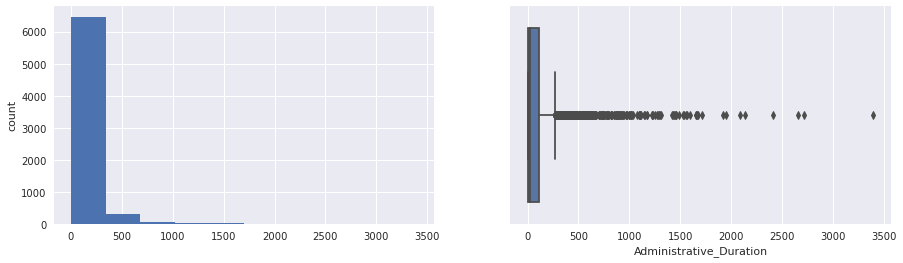


Informational_Duration
Skew:  7.21


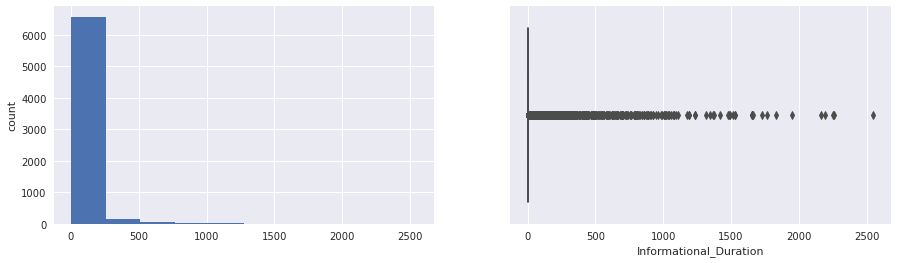


ProductRelated_Duration
Skew:  6.57


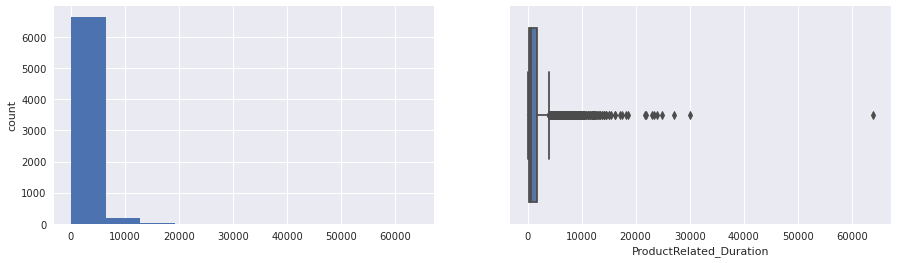


BounceRates
Skew:  3.33


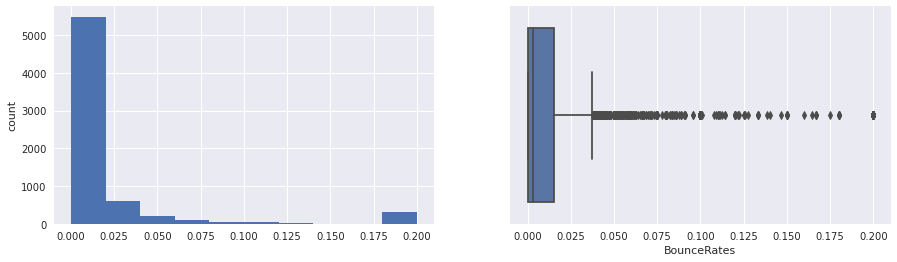


ExitRates
Skew:  2.46


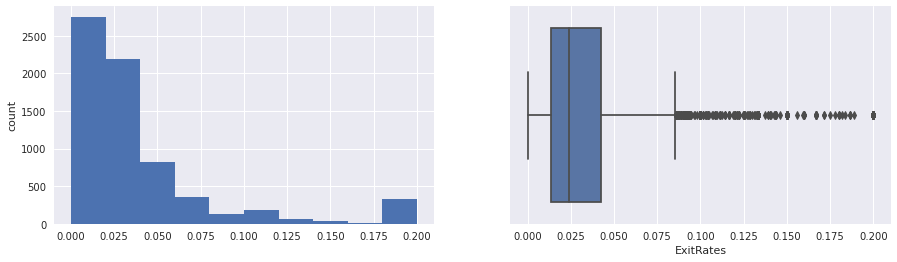


PageValues
Skew:  6.21


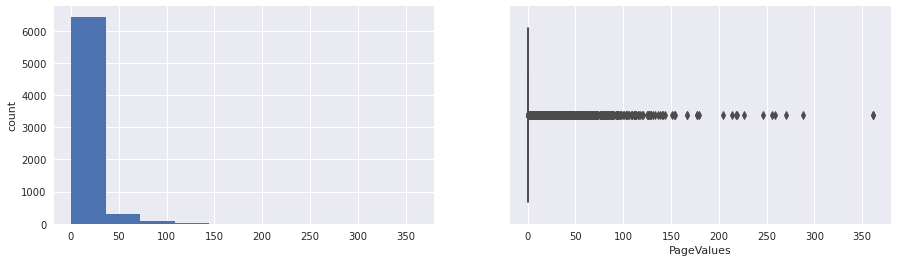


Month


  1. Value Counts: Month
		*  Nov 2998
		*  Dec 1727
		*  Oct 549
		*  Sep 448
		*  Aug 433
		*  Jul 432
		*  June 288

Revenue


  1. Value Counts: Revenue
		*  0 5527
		*  1 1348
Value Counts: 
 0    5527
1    1348
Name: Revenue, dtype: int64


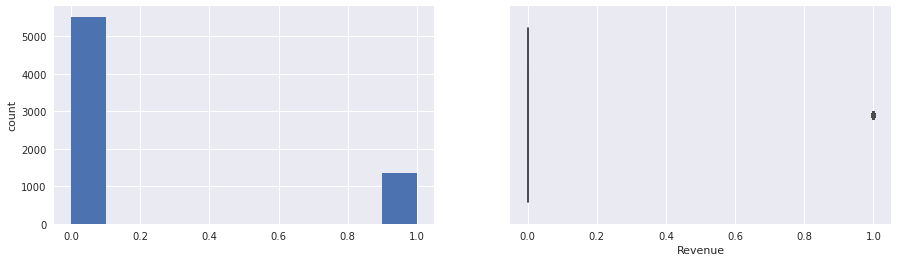


Administrative_0


  1. Value Counts: Administrative_0
		*  0 3997
		*  1 2878

Administrative_1


  1. Value Counts: Administrative_1
		*  0 6076
		*  1 799

Administrative_2


  1. Value Counts: Administrative_2
		*  0 6244
		*  1 631

Administrative_3


  1. Value Counts: Administrative_3
		*  0 6333
		*  1 542

Administrative_4


  1. Value Counts: Administrative_4
		*  0 6414
		*  1 461

Administrative_5


  1. Value Counts: Administrative_5
		*  0 6526
		*  1 349

Administrative_6


  1. Value Counts: Administrative_6
		*  0 6601
		*  1 274

Administrative_7


  1. Value Counts: Administrative_7
		*  0 6657
		*  1 218

Administrative_8


  1. Value Counts: Administrative_8
		*  0 6696
		*  1 179

Administrative_9


  1. Value Counts: Administrative_9
		*  0 6728
		*  1 147

Administrative_10


  1. Value Counts: Administrative_10
		*  0 6776
		*  1 99

Administrative_11


  1. Value Counts: Administrative_11
		*  0 6798
		*  1 77

Administrative_12


  1. Value Counts: Administr

In [26]:
# I know I picked up part of the plot code from a website, 
# but I have lost the reference.

for col in train_set:
     print(col)
     if train_set[col].dtype != 'float64':
          value_dict = train_set[col].value_counts().to_dict()
          print(f'\n\n  1. Value Counts: {col}')
          for vc in value_dict:
               print('\t\t* ', vc, value_dict[vc])
          
          # for cf, num in zip(cat_features, range(1, len(cat_features))):
          #      value_dict = data[cf].value_counts().to_dict()
          #      print(f'\n\n  {num}. Value Counts: {cf}')
          #      for vc in value_dict:
          #           print('\t\t* ', vc, value_dict[vc])

          # print("Value Counts: \n", train_set[col].value_counts())
     if train_set[col].dtype == 'int64':
          print("Value Counts: \n", train_set[col].value_counts())
          plt.figure(figsize=(15,4))
          plt.subplot(1,2,1)
          train_set[col].hist()
          plt.ylabel('count')
          plt.subplot(1,2,2)
          sns.boxplot(x= train_set[col])
          plt.show()
     if train_set[col].dtype == 'float64':
          print('Skew: ', round(train_set[col].skew(),2))
          plt.figure(figsize=(15,4))
          plt.subplot(1,2,1)
          train_set[col].hist()
          plt.ylabel('count')
          plt.subplot(1,2,2)
          sns.boxplot(x= train_set[col])
          plt.show()
     print()

All of the other categorical varialbe counts:


<details>
  <summary>Shown here.</summary>
  
  ##### Catergorical value counts.  
  
Administrative_0


  1. Value Counts: Administrative_0
		*  0 3997
		*  1 2878

Administrative_1


  1. Value Counts: Administrative_1
		*  0 6076
		*  1 799

Administrative_2


  1. Value Counts: Administrative_2
		*  0 6244
		*  1 631

Administrative_3


  1. Value Counts: Administrative_3
		*  0 6333
		*  1 542

Administrative_4


  1. Value Counts: Administrative_4
		*  0 6414
		*  1 461

Administrative_5


  1. Value Counts: Administrative_5
		*  0 6526
		*  1 349

Administrative_6


  1. Value Counts: Administrative_6
		*  0 6601
		*  1 274

Administrative_7


  1. Value Counts: Administrative_7
		*  0 6657
		*  1 218

Administrative_8


  1. Value Counts: Administrative_8
		*  0 6696
		*  1 179

Administrative_9


  1. Value Counts: Administrative_9
		*  0 6728
		*  1 147

Administrative_10


  1. Value Counts: Administrative_10
		*  0 6776
		*  1 99

Administrative_11


  1. Value Counts: Administrative_11
		*  0 6798
		*  1 77

Administrative_12


  1. Value Counts: Administrative_12
		*  0 6812
		*  1 63

Administrative_13


  1. Value Counts: Administrative_13
		*  0 6834
		*  1 41

Administrative_14


  1. Value Counts: Administrative_14
		*  0 6842
		*  1 33

Administrative_15


  1. Value Counts: Administrative_15
		*  0 6848
		*  1 27

Administrative_16


  1. Value Counts: Administrative_16
		*  0 6857
		*  1 18

Administrative_17


  1. Value Counts: Administrative_17
		*  0 6863
		*  1 12

Administrative_18


  1. Value Counts: Administrative_18
		*  0 6865
		*  1 10

Administrative_19


  1. Value Counts: Administrative_19
		*  0 6871
		*  1 4

Administrative_20


  1. Value Counts: Administrative_20
		*  0 6873
		*  1 2

Administrative_21


  1. Value Counts: Administrative_21
		*  0 6873
		*  1 2

Administrative_22


  1. Value Counts: Administrative_22
		*  0 6872
		*  1 3

Administrative_23


  1. Value Counts: Administrative_23
		*  0 6872
		*  1 3

Administrative_24


  1. Value Counts: Administrative_24
		*  0 6874
		*  1 1

Administrative_26


  1. Value Counts: Administrative_26
		*  0 6874
		*  1 1

Administrative_27


  1. Value Counts: Administrative_27
		*  0 6874
		*  1 1

Informational_0


  1. Value Counts: Informational_0
		*  1 5254
		*  0 1621

Informational_1


  1. Value Counts: Informational_1
		*  0 6300
		*  1 575

Informational_2


  1. Value Counts: Informational_2
		*  0 6399
		*  1 476

Informational_3


  1. Value Counts: Informational_3
		*  0 6632
		*  1 243

Informational_4


  1. Value Counts: Informational_4
		*  0 6721
		*  1 154

Informational_5


  1. Value Counts: Informational_5
		*  0 6806
		*  1 69

Informational_6


  1. Value Counts: Informational_6
		*  0 6823
		*  1 52

Informational_7


  1. Value Counts: Informational_7
		*  0 6852
		*  1 23

Informational_8


  1. Value Counts: Informational_8
		*  0 6868
		*  1 7

Informational_9


  1. Value Counts: Informational_9
		*  0 6863
		*  1 12

Informational_10


  1. Value Counts: Informational_10
		*  0 6869
		*  1 6

Informational_11


  1. Value Counts: Informational_11
		*  0 6875

Informational_12


  1. Value Counts: Informational_12
		*  0 6873
		*  1 2

Informational_13


  1. Value Counts: Informational_13
		*  0 6874
		*  1 1

Informational_14


  1. Value Counts: Informational_14
		*  0 6874
		*  1 1

Informational_16


  1. Value Counts: Informational_16
		*  0 6875

Informational_24


  1. Value Counts: Informational_24
		*  0 6875

ProductRelated_0


  1. Value Counts: ProductRelated_0
		*  0 6852
		*  1 23

ProductRelated_1


  1. Value Counts: ProductRelated_1
		*  0 6579
		*  1 296

ProductRelated_2


  1. Value Counts: ProductRelated_2
		*  0 6648
		*  1 227

ProductRelated_3


  1. Value Counts: ProductRelated_3
		*  0 6644
		*  1 231

ProductRelated_4


  1. Value Counts: ProductRelated_4
		*  0 6680
		*  1 195

ProductRelated_5


  1. Value Counts: ProductRelated_5
		*  0 6694
		*  1 181

ProductRelated_6


  1. Value Counts: ProductRelated_6
		*  0 6691
		*  1 184

ProductRelated_7


  1. Value Counts: ProductRelated_7
		*  0 6682
		*  1 193

ProductRelated_8


  1. Value Counts: ProductRelated_8
		*  0 6688
		*  1 187

ProductRelated_9


  1. Value Counts: ProductRelated_9
		*  0 6708
		*  1 167

ProductRelated_10


  1. Value Counts: ProductRelated_10
		*  0 6697
		*  1 178

ProductRelated_11


  1. Value Counts: ProductRelated_11
		*  0 6704
		*  1 171

ProductRelated_12


  1. Value Counts: ProductRelated_12
		*  0 6709
		*  1 166

ProductRelated_13


  1. Value Counts: ProductRelated_13
		*  0 6732
		*  1 143

ProductRelated_14


  1. Value Counts: ProductRelated_14
		*  0 6750
		*  1 125

ProductRelated_15


  1. Value Counts: ProductRelated_15
		*  0 6741
		*  1 134

ProductRelated_16


  1. Value Counts: ProductRelated_16
		*  0 6748
		*  1 127

ProductRelated_17


  1. Value Counts: ProductRelated_17
		*  0 6757
		*  1 118

ProductRelated_18


  1. Value Counts: ProductRelated_18
		*  0 6764
		*  1 111

ProductRelated_19


  1. Value Counts: ProductRelated_19
		*  0 6782
		*  1 93

ProductRelated_20


  1. Value Counts: ProductRelated_20
		*  0 6756
		*  1 119

ProductRelated_21


  1. Value Counts: ProductRelated_21
		*  0 6769
		*  1 106

ProductRelated_22


  1. Value Counts: ProductRelated_22
		*  0 6758
		*  1 117

ProductRelated_23


  1. Value Counts: ProductRelated_23
		*  0 6772
		*  1 103

ProductRelated_24


  1. Value Counts: ProductRelated_24
		*  0 6771
		*  1 104

ProductRelated_25


  1. Value Counts: ProductRelated_25
		*  0 6799
		*  1 76

ProductRelated_26


  1. Value Counts: ProductRelated_26
		*  0 6789
		*  1 86

ProductRelated_27


  1. Value Counts: ProductRelated_27
		*  0 6768
		*  1 107

ProductRelated_28


  1. Value Counts: ProductRelated_28
		*  0 6793
		*  1 82

ProductRelated_29


  1. Value Counts: ProductRelated_29
		*  0 6798
		*  1 77

ProductRelated_30


  1. Value Counts: ProductRelated_30
		*  0 6788
		*  1 87

ProductRelated_31


  1. Value Counts: ProductRelated_31
		*  0 6809
		*  1 66

ProductRelated_32


  1. Value Counts: ProductRelated_32
		*  0 6800
		*  1 75

ProductRelated_33


  1. Value Counts: ProductRelated_33
		*  0 6798
		*  1 77

ProductRelated_34


  1. Value Counts: ProductRelated_34
		*  0 6819
		*  1 56

ProductRelated_35


  1. Value Counts: ProductRelated_35
		*  0 6820
		*  1 55

ProductRelated_36


  1. Value Counts: ProductRelated_36
		*  0 6823
		*  1 52

ProductRelated_37


  1. Value Counts: ProductRelated_37
		*  0 6801
		*  1 74

ProductRelated_38


  1. Value Counts: ProductRelated_38
		*  0 6817
		*  1 58

ProductRelated_39


  1. Value Counts: ProductRelated_39
		*  0 6805
		*  1 70

ProductRelated_40


  1. Value Counts: ProductRelated_40
		*  0 6829
		*  1 46

ProductRelated_41


  1. Value Counts: ProductRelated_41
		*  0 6825
		*  1 50

ProductRelated_42


  1. Value Counts: ProductRelated_42
		*  0 6832
		*  1 43

ProductRelated_43


  1. Value Counts: ProductRelated_43
		*  0 6833
		*  1 42

ProductRelated_44


  1. Value Counts: ProductRelated_44
		*  0 6831
		*  1 44

ProductRelated_45


  1. Value Counts: ProductRelated_45
		*  0 6829
		*  1 46

ProductRelated_46


  1. Value Counts: ProductRelated_46
		*  0 6844
		*  1 31

ProductRelated_47


  1. Value Counts: ProductRelated_47
		*  0 6838
		*  1 37

ProductRelated_48


  1. Value Counts: ProductRelated_48
		*  0 6833
		*  1 42

ProductRelated_49


  1. Value Counts: ProductRelated_49
		*  0 6844
		*  1 31

ProductRelated_50


  1. Value Counts: ProductRelated_50
		*  0 6840
		*  1 35

ProductRelated_51


  1. Value Counts: ProductRelated_51
		*  0 6845
		*  1 30

ProductRelated_52


  1. Value Counts: ProductRelated_52
		*  0 6850
		*  1 25

ProductRelated_53


  1. Value Counts: ProductRelated_53
		*  0 6836
		*  1 39

ProductRelated_54


  1. Value Counts: ProductRelated_54
		*  0 6848
		*  1 27

ProductRelated_55


  1. Value Counts: ProductRelated_55
		*  0 6847
		*  1 28

ProductRelated_56


  1. Value Counts: ProductRelated_56
		*  0 6850
		*  1 25

ProductRelated_57


  1. Value Counts: ProductRelated_57
		*  0 6849
		*  1 26

ProductRelated_58


  1. Value Counts: ProductRelated_58
		*  0 6850
		*  1 25

ProductRelated_59


  1. Value Counts: ProductRelated_59
		*  0 6847
		*  1 28

ProductRelated_60


  1. Value Counts: ProductRelated_60
		*  0 6849
		*  1 26

ProductRelated_61


  1. Value Counts: ProductRelated_61
		*  0 6854
		*  1 21

ProductRelated_62


  1. Value Counts: ProductRelated_62
		*  0 6845
		*  1 30

ProductRelated_63


  1. Value Counts: ProductRelated_63
		*  0 6848
		*  1 27

ProductRelated_64


  1. Value Counts: ProductRelated_64
		*  0 6849
		*  1 26

ProductRelated_65


  1. Value Counts: ProductRelated_65
		*  0 6853
		*  1 22

ProductRelated_66


  1. Value Counts: ProductRelated_66
		*  0 6856
		*  1 19

ProductRelated_67


  1. Value Counts: ProductRelated_67
		*  0 6857
		*  1 18

ProductRelated_68


  1. Value Counts: ProductRelated_68
		*  0 6857
		*  1 18

ProductRelated_69


  1. Value Counts: ProductRelated_69
		*  0 6852
		*  1 23

ProductRelated_70


  1. Value Counts: ProductRelated_70
		*  0 6855
		*  1 20

ProductRelated_71


  1. Value Counts: ProductRelated_71
		*  0 6851
		*  1 24

ProductRelated_72


  1. Value Counts: ProductRelated_72
		*  0 6855
		*  1 20

ProductRelated_73


  1. Value Counts: ProductRelated_73
		*  0 6856
		*  1 19

ProductRelated_74


  1. Value Counts: ProductRelated_74
		*  0 6855
		*  1 20

ProductRelated_75


  1. Value Counts: ProductRelated_75
		*  0 6865
		*  1 10

ProductRelated_76


  1. Value Counts: ProductRelated_76
		*  0 6861
		*  1 14

ProductRelated_77


  1. Value Counts: ProductRelated_77
		*  0 6859
		*  1 16

ProductRelated_78


  1. Value Counts: ProductRelated_78
		*  0 6866
		*  1 9

ProductRelated_79


  1. Value Counts: ProductRelated_79
		*  0 6856
		*  1 19

ProductRelated_80


  1. Value Counts: ProductRelated_80
		*  0 6860
		*  1 15

ProductRelated_81


  1. Value Counts: ProductRelated_81
		*  0 6846
		*  1 29

ProductRelated_82


  1. Value Counts: ProductRelated_82
		*  0 6857
		*  1 18

ProductRelated_83


  1. Value Counts: ProductRelated_83
		*  0 6863
		*  1 12

ProductRelated_84


  1. Value Counts: ProductRelated_84
		*  0 6860
		*  1 15

ProductRelated_85


  1. Value Counts: ProductRelated_85
		*  0 6856
		*  1 19

ProductRelated_86


  1. Value Counts: ProductRelated_86
		*  0 6864
		*  1 11

ProductRelated_87


  1. Value Counts: ProductRelated_87
		*  0 6863
		*  1 12

ProductRelated_88


  1. Value Counts: ProductRelated_88
		*  0 6866
		*  1 9

ProductRelated_89


  1. Value Counts: ProductRelated_89
		*  0 6861
		*  1 14

ProductRelated_90


  1. Value Counts: ProductRelated_90
		*  0 6864
		*  1 11

ProductRelated_91


  1. Value Counts: ProductRelated_91
		*  0 6859
		*  1 16

ProductRelated_92


  1. Value Counts: ProductRelated_92
		*  0 6867
		*  1 8

ProductRelated_93


  1. Value Counts: ProductRelated_93
		*  0 6861
		*  1 14

ProductRelated_94


  1. Value Counts: ProductRelated_94
		*  0 6859
		*  1 16

ProductRelated_95


  1. Value Counts: ProductRelated_95
		*  0 6859
		*  1 16

ProductRelated_96


  1. Value Counts: ProductRelated_96
		*  0 6865
		*  1 10

ProductRelated_97


  1. Value Counts: ProductRelated_97
		*  0 6863
		*  1 12

ProductRelated_98


  1. Value Counts: ProductRelated_98
		*  0 6859
		*  1 16

ProductRelated_99


  1. Value Counts: ProductRelated_99
		*  0 6868
		*  1 7

ProductRelated_100


  1. Value Counts: ProductRelated_100
		*  0 6866
		*  1 9

ProductRelated_101


  1. Value Counts: ProductRelated_101
		*  0 6864
		*  1 11

ProductRelated_102


  1. Value Counts: ProductRelated_102
		*  0 6866
		*  1 9

ProductRelated_103


  1. Value Counts: ProductRelated_103
		*  0 6864
		*  1 11

ProductRelated_104


  1. Value Counts: ProductRelated_104
		*  0 6867
		*  1 8

ProductRelated_105


  1. Value Counts: ProductRelated_105
		*  0 6873
		*  1 2

ProductRelated_106


  1. Value Counts: ProductRelated_106
		*  0 6866
		*  1 9

ProductRelated_107


  1. Value Counts: ProductRelated_107
		*  0 6862
		*  1 13

ProductRelated_108


  1. Value Counts: ProductRelated_108
		*  0 6865
		*  1 10

ProductRelated_109


  1. Value Counts: ProductRelated_109
		*  0 6865
		*  1 10

ProductRelated_110


  1. Value Counts: ProductRelated_110
		*  0 6868
		*  1 7

ProductRelated_111


  1. Value Counts: ProductRelated_111
		*  0 6862
		*  1 13

ProductRelated_112


  1. Value Counts: ProductRelated_112
		*  0 6871
		*  1 4

ProductRelated_113


  1. Value Counts: ProductRelated_113
		*  0 6867
		*  1 8

ProductRelated_114


  1. Value Counts: ProductRelated_114
		*  0 6864
		*  1 11

ProductRelated_115


  1. Value Counts: ProductRelated_115
		*  0 6869
		*  1 6

ProductRelated_116


  1. Value Counts: ProductRelated_116
		*  0 6867
		*  1 8

ProductRelated_117


  1. Value Counts: ProductRelated_117
		*  0 6869
		*  1 6

ProductRelated_118


  1. Value Counts: ProductRelated_118
		*  0 6867
		*  1 8

ProductRelated_119


  1. Value Counts: ProductRelated_119
		*  0 6872
		*  1 3

ProductRelated_120


  1. Value Counts: ProductRelated_120
		*  0 6866
		*  1 9

ProductRelated_121


  1. Value Counts: ProductRelated_121
		*  0 6871
		*  1 4

ProductRelated_122


  1. Value Counts: ProductRelated_122
		*  0 6865
		*  1 10

ProductRelated_123


  1. Value Counts: ProductRelated_123
		*  0 6871
		*  1 4

ProductRelated_124


  1. Value Counts: ProductRelated_124
		*  0 6871
		*  1 4

ProductRelated_125


  1. Value Counts: ProductRelated_125
		*  0 6868
		*  1 7

ProductRelated_126


  1. Value Counts: ProductRelated_126
		*  0 6870
		*  1 5

ProductRelated_127


  1. Value Counts: ProductRelated_127
		*  0 6870
		*  1 5

ProductRelated_128


  1. Value Counts: ProductRelated_128
		*  0 6872
		*  1 3

ProductRelated_129


  1. Value Counts: ProductRelated_129
		*  0 6871
		*  1 4

ProductRelated_130


  1. Value Counts: ProductRelated_130
		*  0 6866
		*  1 9

ProductRelated_131


  1. Value Counts: ProductRelated_131
		*  0 6864
		*  1 11

ProductRelated_132


  1. Value Counts: ProductRelated_132
		*  0 6868
		*  1 7

ProductRelated_133


  1. Value Counts: ProductRelated_133
		*  0 6868
		*  1 7

ProductRelated_134


  1. Value Counts: ProductRelated_134
		*  0 6871
		*  1 4

ProductRelated_135


  1. Value Counts: ProductRelated_135
		*  0 6872
		*  1 3

ProductRelated_136


  1. Value Counts: ProductRelated_136
		*  0 6872
		*  1 3

ProductRelated_137


  1. Value Counts: ProductRelated_137
		*  0 6865
		*  1 10

ProductRelated_138


  1. Value Counts: ProductRelated_138
		*  0 6871
		*  1 4

ProductRelated_139


  1. Value Counts: ProductRelated_139
		*  0 6870
		*  1 5

ProductRelated_140


  1. Value Counts: ProductRelated_140
		*  0 6869
		*  1 6

ProductRelated_141


  1. Value Counts: ProductRelated_141
		*  0 6868
		*  1 7

ProductRelated_142


  1. Value Counts: ProductRelated_142
		*  0 6873
		*  1 2

ProductRelated_143


  1. Value Counts: ProductRelated_143
		*  0 6871
		*  1 4

ProductRelated_144


  1. Value Counts: ProductRelated_144
		*  0 6872
		*  1 3

ProductRelated_145


  1. Value Counts: ProductRelated_145
		*  0 6870
		*  1 5

ProductRelated_146


  1. Value Counts: ProductRelated_146
		*  0 6870
		*  1 5

ProductRelated_147


  1. Value Counts: ProductRelated_147
		*  0 6872
		*  1 3

ProductRelated_148


  1. Value Counts: ProductRelated_148
		*  0 6872
		*  1 3

ProductRelated_149


  1. Value Counts: ProductRelated_149
		*  0 6870
		*  1 5

ProductRelated_150


  1. Value Counts: ProductRelated_150
		*  0 6871
		*  1 4

ProductRelated_151


  1. Value Counts: ProductRelated_151
		*  0 6871
		*  1 4

ProductRelated_152


  1. Value Counts: ProductRelated_152
		*  0 6867
		*  1 8

ProductRelated_153


  1. Value Counts: ProductRelated_153
		*  0 6872
		*  1 3

ProductRelated_154


  1. Value Counts: ProductRelated_154
		*  0 6867
		*  1 8

ProductRelated_155


  1. Value Counts: ProductRelated_155
		*  0 6870
		*  1 5

ProductRelated_156


  1. Value Counts: ProductRelated_156
		*  0 6873
		*  1 2

ProductRelated_157


  1. Value Counts: ProductRelated_157
		*  0 6872
		*  1 3

ProductRelated_158


  1. Value Counts: ProductRelated_158
		*  0 6874
		*  1 1

ProductRelated_159


  1. Value Counts: ProductRelated_159
		*  0 6870
		*  1 5

ProductRelated_160


  1. Value Counts: ProductRelated_160
		*  0 6874
		*  1 1

ProductRelated_161


  1. Value Counts: ProductRelated_161
		*  0 6871
		*  1 4

ProductRelated_162


  1. Value Counts: ProductRelated_162
		*  0 6867
		*  1 8

ProductRelated_163


  1. Value Counts: ProductRelated_163
		*  0 6874
		*  1 1

ProductRelated_164


  1. Value Counts: ProductRelated_164
		*  0 6871
		*  1 4

ProductRelated_165


  1. Value Counts: ProductRelated_165
		*  0 6874
		*  1 1

ProductRelated_166


  1. Value Counts: ProductRelated_166
		*  0 6873
		*  1 2

ProductRelated_167


  1. Value Counts: ProductRelated_167
		*  0 6871
		*  1 4

ProductRelated_168


  1. Value Counts: ProductRelated_168
		*  0 6873
		*  1 2

ProductRelated_169


  1. Value Counts: ProductRelated_169
		*  0 6873
		*  1 2

ProductRelated_170


  1. Value Counts: ProductRelated_170
		*  0 6872
		*  1 3

ProductRelated_171


  1. Value Counts: ProductRelated_171
		*  0 6868
		*  1 7

ProductRelated_172


  1. Value Counts: ProductRelated_172
		*  0 6872
		*  1 3

ProductRelated_173


  1. Value Counts: ProductRelated_173
		*  0 6874
		*  1 1

ProductRelated_174


  1. Value Counts: ProductRelated_174
		*  0 6872
		*  1 3

ProductRelated_175


  1. Value Counts: ProductRelated_175
		*  0 6873
		*  1 2

ProductRelated_176


  1. Value Counts: ProductRelated_176
		*  0 6872
		*  1 3

ProductRelated_177


  1. Value Counts: ProductRelated_177
		*  0 6874
		*  1 1

ProductRelated_178


  1. Value Counts: ProductRelated_178
		*  0 6873
		*  1 2

ProductRelated_179


  1. Value Counts: ProductRelated_179
		*  0 6872
		*  1 3

ProductRelated_180


  1. Value Counts: ProductRelated_180
		*  0 6874
		*  1 1

ProductRelated_181


  1. Value Counts: ProductRelated_181
		*  0 6874
		*  1 1

ProductRelated_182


  1. Value Counts: ProductRelated_182
		*  0 6872
		*  1 3

ProductRelated_183


  1. Value Counts: ProductRelated_183
		*  0 6874
		*  1 1

ProductRelated_184


  1. Value Counts: ProductRelated_184
		*  0 6874
		*  1 1

ProductRelated_186


  1. Value Counts: ProductRelated_186
		*  0 6872
		*  1 3

ProductRelated_187


  1. Value Counts: ProductRelated_187
		*  0 6874
		*  1 1

ProductRelated_188


  1. Value Counts: ProductRelated_188
		*  0 6873
		*  1 2

ProductRelated_189


  1. Value Counts: ProductRelated_189
		*  0 6872
		*  1 3

ProductRelated_190


  1. Value Counts: ProductRelated_190
		*  0 6873
		*  1 2

ProductRelated_191


  1. Value Counts: ProductRelated_191
		*  0 6874
		*  1 1

ProductRelated_192


  1. Value Counts: ProductRelated_192
		*  0 6874
		*  1 1

ProductRelated_193


  1. Value Counts: ProductRelated_193
		*  0 6872
		*  1 3

ProductRelated_194


  1. Value Counts: ProductRelated_194
		*  0 6874
		*  1 1

ProductRelated_195


  1. Value Counts: ProductRelated_195
		*  0 6873
		*  1 2

ProductRelated_197


  1. Value Counts: ProductRelated_197
		*  0 6873
		*  1 2

ProductRelated_198


  1. Value Counts: ProductRelated_198
		*  0 6874
		*  1 1

ProductRelated_199


  1. Value Counts: ProductRelated_199
		*  0 6873
		*  1 2

ProductRelated_200


  1. Value Counts: ProductRelated_200
		*  0 6871
		*  1 4

ProductRelated_202


  1. Value Counts: ProductRelated_202
		*  0 6872
		*  1 3

ProductRelated_204


  1. Value Counts: ProductRelated_204
		*  0 6874
		*  1 1

ProductRelated_205


  1. Value Counts: ProductRelated_205
		*  0 6874
		*  1 1

ProductRelated_206


  1. Value Counts: ProductRelated_206
		*  0 6874
		*  1 1

ProductRelated_207


  1. Value Counts: ProductRelated_207
		*  0 6874
		*  1 1

ProductRelated_210


  1. Value Counts: ProductRelated_210
		*  0 6874
		*  1 1

ProductRelated_211


  1. Value Counts: ProductRelated_211
		*  0 6874
		*  1 1

ProductRelated_213


  1. Value Counts: ProductRelated_213
		*  0 6871
		*  1 4

ProductRelated_216


  1. Value Counts: ProductRelated_216
		*  0 6873
		*  1 2

ProductRelated_217


  1. Value Counts: ProductRelated_217
		*  0 6875

ProductRelated_218


  1. Value Counts: ProductRelated_218
		*  0 6874
		*  1 1

ProductRelated_219


  1. Value Counts: ProductRelated_219
		*  0 6873
		*  1 2

ProductRelated_220


  1. Value Counts: ProductRelated_220
		*  0 6874
		*  1 1

ProductRelated_221


  1. Value Counts: ProductRelated_221
		*  0 6872
		*  1 3

ProductRelated_222


  1. Value Counts: ProductRelated_222
		*  0 6871
		*  1 4

ProductRelated_223


  1. Value Counts: ProductRelated_223
		*  0 6874
		*  1 1

ProductRelated_224


  1. Value Counts: ProductRelated_224
		*  0 6873
		*  1 2

ProductRelated_225


  1. Value Counts: ProductRelated_225
		*  0 6874
		*  1 1

ProductRelated_226


  1. Value Counts: ProductRelated_226
		*  0 6874
		*  1 1

ProductRelated_227


  1. Value Counts: ProductRelated_227
		*  0 6872
		*  1 3

ProductRelated_229


  1. Value Counts: ProductRelated_229
		*  0 6872
		*  1 3

ProductRelated_230


  1. Value Counts: ProductRelated_230
		*  0 6872
		*  1 3

ProductRelated_231


  1. Value Counts: ProductRelated_231
		*  0 6873
		*  1 2

ProductRelated_232


  1. Value Counts: ProductRelated_232
		*  0 6874
		*  1 1

ProductRelated_233


  1. Value Counts: ProductRelated_233
		*  0 6874
		*  1 1

ProductRelated_234


  1. Value Counts: ProductRelated_234
		*  0 6874
		*  1 1

ProductRelated_235


  1. Value Counts: ProductRelated_235
		*  0 6874
		*  1 1

ProductRelated_237


  1. Value Counts: ProductRelated_237
		*  0 6872
		*  1 3

ProductRelated_238


  1. Value Counts: ProductRelated_238
		*  0 6873
		*  1 2

ProductRelated_240


  1. Value Counts: ProductRelated_240
		*  0 6874
		*  1 1

ProductRelated_241


  1. Value Counts: ProductRelated_241
		*  0 6874
		*  1 1

ProductRelated_243


  1. Value Counts: ProductRelated_243
		*  0 6874
		*  1 1

ProductRelated_245


  1. Value Counts: ProductRelated_245
		*  0 6873
		*  1 2

ProductRelated_246


  1. Value Counts: ProductRelated_246
		*  0 6874
		*  1 1

ProductRelated_247


  1. Value Counts: ProductRelated_247
		*  0 6874
		*  1 1

ProductRelated_248


  1. Value Counts: ProductRelated_248
		*  0 6874
		*  1 1

ProductRelated_250


  1. Value Counts: ProductRelated_250
		*  0 6874
		*  1 1

ProductRelated_251


  1. Value Counts: ProductRelated_251
		*  0 6874
		*  1 1

ProductRelated_254


  1. Value Counts: ProductRelated_254
		*  0 6874
		*  1 1

ProductRelated_255


  1. Value Counts: ProductRelated_255
		*  0 6874
		*  1 1

ProductRelated_256


  1. Value Counts: ProductRelated_256
		*  0 6874
		*  1 1

ProductRelated_258


  1. Value Counts: ProductRelated_258
		*  0 6873
		*  1 2

ProductRelated_260


  1. Value Counts: ProductRelated_260
		*  0 6874
		*  1 1

ProductRelated_261


  1. Value Counts: ProductRelated_261
		*  0 6874
		*  1 1

ProductRelated_262


  1. Value Counts: ProductRelated_262
		*  0 6874
		*  1 1

ProductRelated_264


  1. Value Counts: ProductRelated_264
		*  0 6873
		*  1 2

ProductRelated_266


  1. Value Counts: ProductRelated_266
		*  0 6874
		*  1 1

ProductRelated_271


  1. Value Counts: ProductRelated_271
		*  0 6874
		*  1 1

ProductRelated_272


  1. Value Counts: ProductRelated_272
		*  0 6874
		*  1 1

ProductRelated_274


  1. Value Counts: ProductRelated_274
		*  0 6874
		*  1 1

ProductRelated_275


  1. Value Counts: ProductRelated_275
		*  0 6874
		*  1 1

ProductRelated_276


  1. Value Counts: ProductRelated_276
		*  0 6875

ProductRelated_279


  1. Value Counts: ProductRelated_279
		*  0 6874
		*  1 1

ProductRelated_280


  1. Value Counts: ProductRelated_280
		*  0 6873
		*  1 2

ProductRelated_281


  1. Value Counts: ProductRelated_281
		*  0 6874
		*  1 1

ProductRelated_282


  1. Value Counts: ProductRelated_282
		*  0 6874
		*  1 1

ProductRelated_283


  1. Value Counts: ProductRelated_283
		*  0 6874
		*  1 1

ProductRelated_286


  1. Value Counts: ProductRelated_286
		*  0 6874
		*  1 1

ProductRelated_287


  1. Value Counts: ProductRelated_287
		*  0 6875

ProductRelated_290


  1. Value Counts: ProductRelated_290
		*  0 6874
		*  1 1

ProductRelated_291


  1. Value Counts: ProductRelated_291
		*  0 6875

ProductRelated_292


  1. Value Counts: ProductRelated_292
		*  0 6874
		*  1 1

ProductRelated_293


  1. Value Counts: ProductRelated_293
		*  0 6874
		*  1 1

ProductRelated_304


  1. Value Counts: ProductRelated_304
		*  0 6874
		*  1 1

ProductRelated_305


  1. Value Counts: ProductRelated_305
		*  0 6874
		*  1 1

ProductRelated_309


  1. Value Counts: ProductRelated_309
		*  0 6874
		*  1 1

ProductRelated_310


  1. Value Counts: ProductRelated_310
		*  0 6873
		*  1 2

ProductRelated_311


  1. Value Counts: ProductRelated_311
		*  0 6874
		*  1 1

ProductRelated_312


  1. Value Counts: ProductRelated_312
		*  0 6874
		*  1 1

ProductRelated_313


  1. Value Counts: ProductRelated_313
		*  0 6875

ProductRelated_315


  1. Value Counts: ProductRelated_315
		*  0 6874
		*  1 1

ProductRelated_318


  1. Value Counts: ProductRelated_318
		*  0 6874
		*  1 1

ProductRelated_324


  1. Value Counts: ProductRelated_324
		*  0 6874
		*  1 1

ProductRelated_326


  1. Value Counts: ProductRelated_326
		*  0 6874
		*  1 1

ProductRelated_328


  1. Value Counts: ProductRelated_328
		*  0 6875

ProductRelated_330


  1. Value Counts: ProductRelated_330
		*  0 6874
		*  1 1

ProductRelated_336


  1. Value Counts: ProductRelated_336
		*  0 6873
		*  1 2

ProductRelated_337


  1. Value Counts: ProductRelated_337
		*  0 6873
		*  1 2

ProductRelated_338


  1. Value Counts: ProductRelated_338
		*  0 6874
		*  1 1

ProductRelated_339


  1. Value Counts: ProductRelated_339
		*  0 6874
		*  1 1

ProductRelated_340


  1. Value Counts: ProductRelated_340
		*  0 6874
		*  1 1

ProductRelated_343


  1. Value Counts: ProductRelated_343
		*  0 6874
		*  1 1

ProductRelated_346


  1. Value Counts: ProductRelated_346
		*  0 6874
		*  1 1

ProductRelated_349


  1. Value Counts: ProductRelated_349
		*  0 6874
		*  1 1

ProductRelated_351


  1. Value Counts: ProductRelated_351
		*  0 6874
		*  1 1

ProductRelated_357


  1. Value Counts: ProductRelated_357
		*  0 6874
		*  1 1

ProductRelated_358


  1. Value Counts: ProductRelated_358
		*  0 6874
		*  1 1

ProductRelated_359


  1. Value Counts: ProductRelated_359
		*  0 6874
		*  1 1

ProductRelated_362


  1. Value Counts: ProductRelated_362
		*  0 6875

ProductRelated_374


  1. Value Counts: ProductRelated_374
		*  0 6874
		*  1 1

ProductRelated_377


  1. Value Counts: ProductRelated_377
		*  0 6874
		*  1 1

ProductRelated_378


  1. Value Counts: ProductRelated_378
		*  0 6874
		*  1 1

ProductRelated_385


  1. Value Counts: ProductRelated_385
		*  0 6874
		*  1 1

ProductRelated_391


  1. Value Counts: ProductRelated_391
		*  0 6874
		*  1 1

ProductRelated_397


  1. Value Counts: ProductRelated_397
		*  0 6874
		*  1 1

ProductRelated_401


  1. Value Counts: ProductRelated_401
		*  0 6873
		*  1 2

ProductRelated_409


  1. Value Counts: ProductRelated_409
		*  0 6874
		*  1 1

ProductRelated_414


  1. Value Counts: ProductRelated_414
		*  0 6874
		*  1 1

ProductRelated_423


  1. Value Counts: ProductRelated_423
		*  0 6874
		*  1 1

ProductRelated_429


  1. Value Counts: ProductRelated_429
		*  0 6874
		*  1 1

ProductRelated_439


  1. Value Counts: ProductRelated_439
		*  0 6873
		*  1 2

ProductRelated_440


  1. Value Counts: ProductRelated_440
		*  0 6875

ProductRelated_449


  1. Value Counts: ProductRelated_449
		*  0 6874
		*  1 1

ProductRelated_470


  1. Value Counts: ProductRelated_470
		*  0 6874
		*  1 1

ProductRelated_486


  1. Value Counts: ProductRelated_486
		*  0 6874
		*  1 1

ProductRelated_501


  1. Value Counts: ProductRelated_501
		*  0 6874
		*  1 1

ProductRelated_517


  1. Value Counts: ProductRelated_517
		*  0 6874
		*  1 1

ProductRelated_518


  1. Value Counts: ProductRelated_518
		*  0 6874
		*  1 1

ProductRelated_534


  1. Value Counts: ProductRelated_534
		*  0 6874
		*  1 1

ProductRelated_584


  1. Value Counts: ProductRelated_584
		*  0 6874
		*  1 1

ProductRelated_686


  1. Value Counts: ProductRelated_686
		*  0 6874
		*  1 1

ProductRelated_705


  1. Value Counts: ProductRelated_705
		*  0 6875

OperatingSystems_1


  1. Value Counts: OperatingSystems_1
		*  0 5354
		*  1 1521

OperatingSystems_2


  1. Value Counts: OperatingSystems_2
		*  1 3552
		*  0 3323

OperatingSystems_3


  1. Value Counts: OperatingSystems_3
		*  0 5439
		*  1 1436

OperatingSystems_4


  1. Value Counts: OperatingSystems_4
		*  0 6604
		*  1 271

OperatingSystems_5


  1. Value Counts: OperatingSystems_5
		*  0 6869
		*  1 6

OperatingSystems_6


  1. Value Counts: OperatingSystems_6
		*  0 6867
		*  1 8

OperatingSystems_7


  1. Value Counts: OperatingSystems_7
		*  0 6872
		*  1 3

OperatingSystems_8


  1. Value Counts: OperatingSystems_8
		*  0 6797
		*  1 78

Browser_1


  1. Value Counts: Browser_1
		*  0 5457
		*  1 1418

Browser_2


  1. Value Counts: Browser_2
		*  1 4471
		*  0 2404

Browser_3


  1. Value Counts: Browser_3
		*  0 6833
		*  1 42

Browser_4


  1. Value Counts: Browser_4
		*  0 6526
		*  1 349

Browser_5


  1. Value Counts: Browser_5
		*  0 6641
		*  1 234

Browser_6


  1. Value Counts: Browser_6
		*  0 6803
		*  1 72

Browser_7


  1. Value Counts: Browser_7
		*  0 6851
		*  1 24

Browser_8


  1. Value Counts: Browser_8
		*  0 6782
		*  1 93

Browser_9


  1. Value Counts: Browser_9
		*  0 6875

Browser_10


  1. Value Counts: Browser_10
		*  0 6779
		*  1 96

Browser_11


  1. Value Counts: Browser_11
		*  0 6869
		*  1 6

Browser_12


  1. Value Counts: Browser_12
		*  0 6866
		*  1 9

Browser_13


  1. Value Counts: Browser_13
		*  0 6814
		*  1 61

Region_1


  1. Value Counts: Region_1
		*  0 4185
		*  1 2690

Region_2


  1. Value Counts: Region_2
		*  0 6298
		*  1 577

Region_3


  1. Value Counts: Region_3
		*  0 5533
		*  1 1342

Region_4


  1. Value Counts: Region_4
		*  0 6219
		*  1 656

Region_5


  1. Value Counts: Region_5
		*  0 6704
		*  1 171

Region_6


  1. Value Counts: Region_6
		*  0 6467
		*  1 408

Region_7


  1. Value Counts: Region_7
		*  0 6449
		*  1 426

Region_8


  1. Value Counts: Region_8
		*  0 6637
		*  1 238

Region_9


  1. Value Counts: Region_9
		*  0 6508
		*  1 367

TrafficType_1


  1. Value Counts: TrafficType_1
		*  0 5519
		*  1 1356

TrafficType_2


  1. Value Counts: TrafficType_2
		*  0 4260
		*  1 2615

TrafficType_3


  1. Value Counts: TrafficType_3
		*  0 5982
		*  1 893

TrafficType_4


  1. Value Counts: TrafficType_4
		*  0 6534
		*  1 341

TrafficType_5


  1. Value Counts: TrafficType_5
		*  0 6706
		*  1 169

TrafficType_6


  1. Value Counts: TrafficType_6
		*  0 6720
		*  1 155

TrafficType_7


  1. Value Counts: TrafficType_7
		*  0 6851
		*  1 24

TrafficType_8


  1. Value Counts: TrafficType_8
		*  0 6618
		*  1 257

TrafficType_9


  1. Value Counts: TrafficType_9
		*  0 6875

TrafficType_10


  1. Value Counts: TrafficType_10
		*  0 6557
		*  1 318

TrafficType_11


  1. Value Counts: TrafficType_11
		*  0 6729
		*  1 146

TrafficType_12


  1. Value Counts: TrafficType_12
		*  0 6875

TrafficType_13


  1. Value Counts: TrafficType_13
		*  0 6471
		*  1 404

TrafficType_14


  1. Value Counts: TrafficType_14
		*  0 6874
		*  1 1

TrafficType_15


  1. Value Counts: TrafficType_15
		*  0 6865
		*  1 10

TrafficType_16


  1. Value Counts: TrafficType_16
		*  0 6874
		*  1 1

TrafficType_17


  1. Value Counts: TrafficType_17
		*  0 6875

TrafficType_18


  1. Value Counts: TrafficType_18
		*  0 6875

TrafficType_19


  1. Value Counts: TrafficType_19
		*  0 6875

TrafficType_20


  1. Value Counts: TrafficType_20
		*  0 6690
		*  1 185

VisitorType_New_Visitor


  1. Value Counts: VisitorType_New_Visitor
		*  0 5733
		*  1 1142

VisitorType_Returning_Visitor


  1. Value Counts: VisitorType_Returning_Visitor
		*  1 5648
		*  0 1227

Weekend_0


  1. Value Counts: Weekend_0
		*  1 5231
		*  0 1644

Weekend_1


  1. Value Counts: Weekend_1
		*  0 5231
		*  1 1644


</details>



All of the above plots of the continous and integer variables skew *left*.

 Now removing `Month` as the months in the training set do not appear in the testing set and vice versa.

In [27]:
train_set.drop(axis = 1, columns = 'Month', inplace = True)
test_set.drop(axis = 1, columns = 'Month', inplace = True)

print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6875 entries, 5455 to 12329
Columns: 416 entries, Administrative_Duration to Weekend_1
dtypes: float64(6), int64(1), uint8(409)
memory usage: 3.1 MB
None


/tmp/ipykernel_12998/3324255064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop(axis = 1, columns = 'Month', inplace = True)
/tmp/ipykernel_12998/3324255064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.drop(axis = 1, columns = 'Month', inplace = True)


In [28]:
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Columns: 416 entries, Administrative_Duration to Weekend_1
dtypes: float64(6), int64(1), uint8(409)
memory usage: 965.9 KB
None


Examining the train set and test set

In [29]:
train_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative_Duration,6875.0,90.741434,185.024829,0.0,0.000000,22.000000,107.800000,3398.75000
Informational_Duration,6875.0,39.961299,155.978115,0.0,0.000000,0.000000,0.000000,2549.37500
ProductRelated_Duration,6875.0,1424.355240,2231.381312,0.0,224.779167,710.066667,1746.904342,63973.52223
BounceRates,6875.0,0.019368,0.044370,0.0,0.000000,0.003371,0.015187,0.20000
ExitRates,6875.0,0.038991,0.044806,0.0,0.013800,0.024226,0.042486,0.20000
...,...,...,...,...,...,...,...,...
TrafficType_20,6875.0,0.026909,0.161830,0.0,0.000000,0.000000,0.000000,1.00000
VisitorType_New_Visitor,6875.0,0.166109,0.372206,0.0,0.000000,0.000000,0.000000,1.00000
VisitorType_Returning_Visitor,6875.0,0.821527,0.382938,0.0,1.000000,1.000000,1.000000,1.00000
Weekend_0,6875.0,0.760873,0.426582,0.0,1.000000,1.000000,1.000000,1.00000


In [30]:
test_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative_Duration,2091.0,66.448115,167.300840,0.000000,0.000000,0.000000,64.000000,2047.234848
Informational_Duration,2091.0,28.184538,115.613729,0.000000,0.000000,0.000000,0.000000,1467.000000
ProductRelated_Duration,2091.0,782.252683,1102.819418,0.000000,119.166667,412.000000,1043.672619,12983.787710
BounceRates,2091.0,0.023954,0.054888,0.000000,0.000000,0.000000,0.014286,0.200000
ExitRates,2091.0,0.047200,0.054111,0.000176,0.013333,0.025541,0.052566,0.200000
...,...,...,...,...,...,...,...,...
TrafficType_20,2091.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VisitorType_New_Visitor,2091.0,0.111430,0.314739,0.000000,0.000000,0.000000,0.000000,1.000000
VisitorType_Returning_Visitor,2091.0,0.888570,0.314739,0.000000,1.000000,1.000000,1.000000,1.000000
Weekend_0,2091.0,0.756576,0.429252,0.000000,1.000000,1.000000,1.000000,1.000000


The data is now split into a training set and a testing set.

##### **It looks like the mean/min/max spread are not evenly split in the two sets between all of the variables. I expect this will cause issues - so avoiding overfitting on the training data will be important.**

As can be seen - there are way too many categorical variables now. I want the model to retain some explanability, so I am going to perform PCA on the catergorical columns created with the one hot encoding.

#### Feature Selection

The current columns:

In [31]:
print("All columns: ")
for col in train_set.columns:
    print(f'  1.  {col}')

All columns: 
  1.  Administrative_Duration
  1.  Informational_Duration
  1.  ProductRelated_Duration
  1.  BounceRates
  1.  ExitRates
  1.  PageValues
  1.  Revenue
  1.  Administrative_0
  1.  Administrative_1
  1.  Administrative_2
  1.  Administrative_3
  1.  Administrative_4
  1.  Administrative_5
  1.  Administrative_6
  1.  Administrative_7
  1.  Administrative_8
  1.  Administrative_9
  1.  Administrative_10
  1.  Administrative_11
  1.  Administrative_12
  1.  Administrative_13
  1.  Administrative_14
  1.  Administrative_15
  1.  Administrative_16
  1.  Administrative_17
  1.  Administrative_18
  1.  Administrative_19
  1.  Administrative_20
  1.  Administrative_21
  1.  Administrative_22
  1.  Administrative_23
  1.  Administrative_24
  1.  Administrative_26
  1.  Administrative_27
  1.  Informational_0
  1.  Informational_1
  1.  Informational_2
  1.  Informational_3
  1.  Informational_4
  1.  Informational_5
  1.  Informational_6
  1.  Informational_7
  1.  Informationa

All current columns listed in Details:
<details>

  ##### All columns: 
  1.  Administrative_Duration
  1.  Informational_Duration
  1.  ProductRelated_Duration
  1.  BounceRates
  1.  ExitRates
  1.  PageValues
  1.  Month
  1.  Revenue
  1.  Administrative_0
  1.  Administrative_1
  1.  Administrative_2
  1.  Administrative_3
  1.  Administrative_4
  1.  Administrative_5
  1.  Administrative_6
  1.  Administrative_7
  1.  Administrative_8
  1.  Administrative_9
  1.  Administrative_10
  1.  Administrative_11
  1.  Administrative_12
  1.  Administrative_13
  1.  Administrative_14
  1.  Administrative_15
  1.  Administrative_16
  1.  Administrative_17
  1.  Administrative_18
  1.  Administrative_19
  1.  Administrative_20
  1.  Administrative_21
  1.  Administrative_22
  1.  Administrative_23
  1.  Administrative_24
  1.  Administrative_26
  1.  Administrative_27
  1.  Informational_0
  1.  Informational_1
  1.  Informational_2
  1.  Informational_3
  1.  Informational_4
  1.  Informational_5
  1.  Informational_6
  1.  Informational_7
  1.  Informational_8
  1.  Informational_9
  1.  Informational_10
  1.  Informational_11
  1.  Informational_12
  1.  Informational_13
  1.  Informational_14
  1.  Informational_16
  1.  Informational_24
  1.  ProductRelated_0
  1.  ProductRelated_1
  1.  ProductRelated_2
  1.  ProductRelated_3
  1.  ProductRelated_4
  1.  ProductRelated_5
  1.  ProductRelated_6
  1.  ProductRelated_7
  1.  ProductRelated_8
  1.  ProductRelated_9
  1.  ProductRelated_10
  1.  ProductRelated_11
  1.  ProductRelated_12
  1.  ProductRelated_13
  1.  ProductRelated_14
  1.  ProductRelated_15
  1.  ProductRelated_16
  1.  ProductRelated_17
  1.  ProductRelated_18
  1.  ProductRelated_19
  1.  ProductRelated_20
  1.  ProductRelated_21
  1.  ProductRelated_22
  1.  ProductRelated_23
  1.  ProductRelated_24
  1.  ProductRelated_25
  1.  ProductRelated_26
  1.  ProductRelated_27
  1.  ProductRelated_28
  1.  ProductRelated_29
  1.  ProductRelated_30
  1.  ProductRelated_31
  1.  ProductRelated_32
  1.  ProductRelated_33
  1.  ProductRelated_34
  1.  ProductRelated_35
  1.  ProductRelated_36
  1.  ProductRelated_37
  1.  ProductRelated_38
  1.  ProductRelated_39
  1.  ProductRelated_40
  1.  ProductRelated_41
  1.  ProductRelated_42
  1.  ProductRelated_43
  1.  ProductRelated_44
  1.  ProductRelated_45
  1.  ProductRelated_46
  1.  ProductRelated_47
  1.  ProductRelated_48
  1.  ProductRelated_49
  1.  ProductRelated_50
  1.  ProductRelated_51
  1.  ProductRelated_52
  1.  ProductRelated_53
  1.  ProductRelated_54
  1.  ProductRelated_55
  1.  ProductRelated_56
  1.  ProductRelated_57
  1.  ProductRelated_58
  1.  ProductRelated_59
  1.  ProductRelated_60
  1.  ProductRelated_61
  1.  ProductRelated_62
  1.  ProductRelated_63
  1.  ProductRelated_64
  1.  ProductRelated_65
  1.  ProductRelated_66
  1.  ProductRelated_67
  1.  ProductRelated_68
  1.  ProductRelated_69
  1.  ProductRelated_70
  1.  ProductRelated_71
  1.  ProductRelated_72
  1.  ProductRelated_73
  1.  ProductRelated_74
  1.  ProductRelated_75
  1.  ProductRelated_76
  1.  ProductRelated_77
  1.  ProductRelated_78
  1.  ProductRelated_79
  1.  ProductRelated_80
  1.  ProductRelated_81
  1.  ProductRelated_82
  1.  ProductRelated_83
  1.  ProductRelated_84
  1.  ProductRelated_85
  1.  ProductRelated_86
  1.  ProductRelated_87
  1.  ProductRelated_88
  1.  ProductRelated_89
  1.  ProductRelated_90
  1.  ProductRelated_91
  1.  ProductRelated_92
  1.  ProductRelated_93
  1.  ProductRelated_94
  1.  ProductRelated_95
  1.  ProductRelated_96
  1.  ProductRelated_97
  1.  ProductRelated_98
  1.  ProductRelated_99
  1.  ProductRelated_100
  1.  ProductRelated_101
  1.  ProductRelated_102
  1.  ProductRelated_103
  1.  ProductRelated_104
  1.  ProductRelated_105
  1.  ProductRelated_106
  1.  ProductRelated_107
  1.  ProductRelated_108
  1.  ProductRelated_109
  1.  ProductRelated_110
  1.  ProductRelated_111
  1.  ProductRelated_112
  1.  ProductRelated_113
  1.  ProductRelated_114
  1.  ProductRelated_115
  1.  ProductRelated_116
  1.  ProductRelated_117
  1.  ProductRelated_118
  1.  ProductRelated_119
  1.  ProductRelated_120
  1.  ProductRelated_121
  1.  ProductRelated_122
  1.  ProductRelated_123
  1.  ProductRelated_124
  1.  ProductRelated_125
  1.  ProductRelated_126
  1.  ProductRelated_127
  1.  ProductRelated_128
  1.  ProductRelated_129
  1.  ProductRelated_130
  1.  ProductRelated_131
  1.  ProductRelated_132
  1.  ProductRelated_133
  1.  ProductRelated_134
  1.  ProductRelated_135
  1.  ProductRelated_136
  1.  ProductRelated_137
  1.  ProductRelated_138
  1.  ProductRelated_139
  1.  ProductRelated_140
  1.  ProductRelated_141
  1.  ProductRelated_142
  1.  ProductRelated_143
  1.  ProductRelated_144
  1.  ProductRelated_145
  1.  ProductRelated_146
  1.  ProductRelated_147
  1.  ProductRelated_148
  1.  ProductRelated_149
  1.  ProductRelated_150
  1.  ProductRelated_151
  1.  ProductRelated_152
  1.  ProductRelated_153
  1.  ProductRelated_154
  1.  ProductRelated_155
  1.  ProductRelated_156
  1.  ProductRelated_157
  1.  ProductRelated_158
  1.  ProductRelated_159
  1.  ProductRelated_160
  1.  ProductRelated_161
  1.  ProductRelated_162
  1.  ProductRelated_163
  1.  ProductRelated_164
  1.  ProductRelated_165
  1.  ProductRelated_166
  1.  ProductRelated_167
  1.  ProductRelated_168
  1.  ProductRelated_169
  1.  ProductRelated_170
  1.  ProductRelated_171
  1.  ProductRelated_172
  1.  ProductRelated_173
  1.  ProductRelated_174
  1.  ProductRelated_175
  1.  ProductRelated_176
  1.  ProductRelated_177
  1.  ProductRelated_178
  1.  ProductRelated_179
  1.  ProductRelated_180
  1.  ProductRelated_181
  1.  ProductRelated_182
  1.  ProductRelated_183
  1.  ProductRelated_184
  1.  ProductRelated_186
  1.  ProductRelated_187
  1.  ProductRelated_188
  1.  ProductRelated_189
  1.  ProductRelated_190
  1.  ProductRelated_191
  1.  ProductRelated_192
  1.  ProductRelated_193
  1.  ProductRelated_194
  1.  ProductRelated_195
  1.  ProductRelated_197
  1.  ProductRelated_198
  1.  ProductRelated_199
  1.  ProductRelated_200
  1.  ProductRelated_202
  1.  ProductRelated_204
  1.  ProductRelated_205
  1.  ProductRelated_206
  1.  ProductRelated_207
  1.  ProductRelated_210
  1.  ProductRelated_211
  1.  ProductRelated_213
  1.  ProductRelated_216
  1.  ProductRelated_217
  1.  ProductRelated_218
  1.  ProductRelated_219
  1.  ProductRelated_220
  1.  ProductRelated_221
  1.  ProductRelated_222
  1.  ProductRelated_223
  1.  ProductRelated_224
  1.  ProductRelated_225
  1.  ProductRelated_226
  1.  ProductRelated_227
  1.  ProductRelated_229
  1.  ProductRelated_230
  1.  ProductRelated_231
  1.  ProductRelated_232
  1.  ProductRelated_233
  1.  ProductRelated_234
  1.  ProductRelated_235
  1.  ProductRelated_237
  1.  ProductRelated_238
  1.  ProductRelated_240
  1.  ProductRelated_241
  1.  ProductRelated_243
  1.  ProductRelated_245
  1.  ProductRelated_246
  1.  ProductRelated_247
  1.  ProductRelated_248
  1.  ProductRelated_250
  1.  ProductRelated_251
  1.  ProductRelated_254
  1.  ProductRelated_255
  1.  ProductRelated_256
  1.  ProductRelated_258
  1.  ProductRelated_260
  1.  ProductRelated_261
  1.  ProductRelated_262
  1.  ProductRelated_264
  1.  ProductRelated_266
  1.  ProductRelated_271
  1.  ProductRelated_272
  1.  ProductRelated_274
  1.  ProductRelated_275
  1.  ProductRelated_276
  1.  ProductRelated_279
  1.  ProductRelated_280
  1.  ProductRelated_281
  1.  ProductRelated_282
  1.  ProductRelated_283
  1.  ProductRelated_286
  1.  ProductRelated_287
  1.  ProductRelated_290
  1.  ProductRelated_291
  1.  ProductRelated_292
  1.  ProductRelated_293
  1.  ProductRelated_304
  1.  ProductRelated_305
  1.  ProductRelated_309
  1.  ProductRelated_310
  1.  ProductRelated_311
  1.  ProductRelated_312
  1.  ProductRelated_313
  1.  ProductRelated_315
  1.  ProductRelated_318
  1.  ProductRelated_324
  1.  ProductRelated_326
  1.  ProductRelated_328
  1.  ProductRelated_330
  1.  ProductRelated_336
  1.  ProductRelated_337
  1.  ProductRelated_338
  1.  ProductRelated_339
  1.  ProductRelated_340
  1.  ProductRelated_343
  1.  ProductRelated_346
  1.  ProductRelated_349
  1.  ProductRelated_351
  1.  ProductRelated_357
  1.  ProductRelated_358
  1.  ProductRelated_359
  1.  ProductRelated_362
  1.  ProductRelated_374
  1.  ProductRelated_377
  1.  ProductRelated_378
  1.  ProductRelated_385
  1.  ProductRelated_391
  1.  ProductRelated_397
  1.  ProductRelated_401
  1.  ProductRelated_409
  1.  ProductRelated_414
  1.  ProductRelated_423
  1.  ProductRelated_429
  1.  ProductRelated_439
  1.  ProductRelated_440
  1.  ProductRelated_449
  1.  ProductRelated_470
  1.  ProductRelated_486
  1.  ProductRelated_501
  1.  ProductRelated_517
  1.  ProductRelated_518
  1.  ProductRelated_534
  1.  ProductRelated_584
  1.  ProductRelated_686
  1.  ProductRelated_705
  1.  OperatingSystems_1
  1.  OperatingSystems_2
  1.  OperatingSystems_3
  1.  OperatingSystems_4
  1.  OperatingSystems_5
  1.  OperatingSystems_6
  1.  OperatingSystems_7
  1.  OperatingSystems_8
  1.  Browser_1
  1.  Browser_2
  1.  Browser_3
  1.  Browser_4
  1.  Browser_5
  1.  Browser_6
  1.  Browser_7
  1.  Browser_8
  1.  Browser_9
  1.  Browser_10
  1.  Browser_11
  1.  Browser_12
  1.  Browser_13
  1.  Region_1
  1.  Region_2
  1.  Region_3
  1.  Region_4
  1.  Region_5
  1.  Region_6
  1.  Region_7
  1.  Region_8
  1.  Region_9
  1.  TrafficType_1
  1.  TrafficType_2
  1.  TrafficType_3
  1.  TrafficType_4
  1.  TrafficType_5
  1.  TrafficType_6
  1.  TrafficType_7
  1.  TrafficType_8
  1.  TrafficType_9
  1.  TrafficType_10
  1.  TrafficType_11
  1.  TrafficType_12
  1.  TrafficType_13
  1.  TrafficType_14
  1.  TrafficType_15
  1.  TrafficType_16
  1.  TrafficType_17
  1.  TrafficType_18
  1.  TrafficType_19
  1.  TrafficType_20
  1.  VisitorType_New_Visitor
  1.  VisitorType_Returning_Visitor
  1.  Weekend_0
  1.  Weekend_1
  
</details>




Removing the columns that I do not want to reduce with PCA.

In [32]:
NotPCAcolumns = ['Administrative_Duration', 
                 'Informational_Duration', 
                 'ProductRelated_Duration',
                 'BounceRates',
                 'ExitRates',
                 'PageValues',
                 'Revenue'
                ]

NotPCAdata = train_set.copy()
print(train_set.T) # checking the number of columns before dropping any of them.
NotPCAdata = NotPCAdata[NotPCAcolumns]

                                    5455        5456   5457         5458   \
Administrative_Duration          0.000000   40.200000   63.4   618.066667   
Informational_Duration           0.000000    0.000000    0.0     0.000000   
ProductRelated_Duration        207.570248  201.133333  120.4  1342.083333   
BounceRates                      0.000000    0.000000    0.0     0.000000   
ExitRates                        0.007937    0.020000    0.0     0.004386   
...                                   ...         ...    ...          ...   
TrafficType_20                   0.000000    0.000000    0.0     0.000000   
VisitorType_New_Visitor          0.000000    1.000000    1.0     1.000000   
VisitorType_Returning_Visitor    1.000000    0.000000    0.0     0.000000   
Weekend_0                        1.000000    1.000000    1.0     1.000000   
Weekend_1                        0.000000    0.000000    0.0     0.000000   

                               5459        5460        5461        5462   \

In [33]:
NotPCAdata.T

,5455,5456,5457,5458,5459,5460,5461,5462,5463,5464,...,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329
Administrative_Duration,0.000000,40.200000,63.400000,618.066667,0.0,152.600000,56.300000,0.000000,39.20,89.600000,...,0.000000,0.0,76.250000,64.750000,0.000000,145.000000,0.000000,0.000000,75.000000,0.000000
Informational_Duration,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,120.80,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ProductRelated_Duration,207.570248,201.133333,120.400000,1342.083333,7.0,608.883333,315.400000,419.600000,80.50,1721.906667,...,143.583333,0.0,1075.250000,1157.976190,503.000000,1783.791667,465.750000,184.250000,346.000000,21.250000
BounceRates,0.000000,0.000000,0.000000,0.000000,0.0,0.009375,0.000000,0.038095,0.00,0.000000,...,0.014286,0.2,0.000000,0.000000,0.000000,0.007143,0.000000,0.083333,0.000000,0.000000
ExitRates,0.007937,0.020000,0.000000,0.004386,0.1,0.031250,0.011111,0.068254,0.01,0.005932,...,0.050000,0.2,0.004167,0.013953,0.037647,0.029031,0.021333,0.086667,0.021053,0.066667
PageValues,0.000000,0.000000,42.293068,28.068050,0.0,19.827709,0.000000,0.000000,0.00,204.007949,...,0.000000,0.0,0.000000,0.000000,0.000000,12.241717,0.000000,0.000000,0.000000,0.000000
Revenue,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.00,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Doing PCA on remaining columns.

In [34]:
PCAdata = train_set.copy()
PCAdata = PCAdata.drop(columns = NotPCAcolumns)
print(PCAdata.T)

                               5455   5456   5457   5458   5459   5460   \
Administrative_0                   1      0      0      0      1      0   
Administrative_1                   0      0      1      0      0      0   
Administrative_2                   0      0      0      0      0      0   
Administrative_3                   0      1      0      0      0      1   
Administrative_4                   0      0      0      0      0      0   
...                              ...    ...    ...    ...    ...    ...   
TrafficType_20                     0      0      0      0      0      0   
VisitorType_New_Visitor            0      1      1      1      0      0   
VisitorType_Returning_Visitor      1      0      0      0      1      1   
Weekend_0                          1      1      1      1      1      1   
Weekend_1                          0      0      0      0      0      0   

                               5461   5462   5463   5464   ...  12320  12321  \
Administrative_0   

The PCAdata doesn't need to be scaled as all values are either zero or one.

In [35]:
PCAdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative_0,6875.0,0.418618,0.493368,0.0,0.0,0.0,1.0,1.0
Administrative_1,6875.0,0.116218,0.320510,0.0,0.0,0.0,0.0,1.0
Administrative_2,6875.0,0.091782,0.288739,0.0,0.0,0.0,0.0,1.0
Administrative_3,6875.0,0.078836,0.269503,0.0,0.0,0.0,0.0,1.0
Administrative_4,6875.0,0.067055,0.250135,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
TrafficType_20,6875.0,0.026909,0.161830,0.0,0.0,0.0,0.0,1.0
VisitorType_New_Visitor,6875.0,0.166109,0.372206,0.0,0.0,0.0,0.0,1.0
VisitorType_Returning_Visitor,6875.0,0.821527,0.382938,0.0,1.0,1.0,1.0,1.0
Weekend_0,6875.0,0.760873,0.426582,0.0,1.0,1.0,1.0,1.0


Performing PCA feature selection on PCAdata.

In [36]:
pca = PCA(n_components = 20, whiten = True, random_state = random_seed) # Choosing 20 components
scaler = StandardScaler()
PCAdata = scaler.fit_transform(PCAdata)
PCAdata= pca.fit_transform(PCAdata)
PCAdata = pd.DataFrame(PCAdata)
PCAdata.describe().T

,count,mean,std,min,25%,50%,75%,max
0,6875.0,8.353722e-17,1.0,-3.070585,-0.553716,0.214306,0.647617,4.045848
1,6875.0,2.096020e-16,1.0,-5.277030,-0.648651,0.115153,0.615850,5.827102
2,6875.0,1.501022e-17,1.0,-4.860294,-0.646561,0.128703,0.754202,10.727714
3,6875.0,-1.984998e-16,1.0,-2.465828,-0.420340,-0.001812,0.428103,11.417166
4,6875.0,2.668774e-17,1.0,-10.033089,-0.222416,-0.035499,0.159530,49.482411
5,6875.0,-7.790132e-17,1.0,-7.932727,-0.628735,-0.243501,0.561246,39.215967
6,6875.0,9.555185e-17,1.0,-4.559945,-0.341237,0.138478,0.374503,63.094878
7,6875.0,7.872491e-19,1.0,-5.283089,-0.084669,-0.008232,0.056698,79.686456
8,6875.0,5.558382e-17,1.0,-28.136593,-0.147562,-0.007532,0.127712,54.903290
9,6875.0,-4.926160e-17,1.0,-1.425689,-0.186770,-0.047049,0.133450,75.326381


Now transforming the test data with the scaler and PCA before recombining both training and testing data sets with the features that did not go through PCA.

In [37]:
NotPCAdataTest = test_set.copy()
NotPCAdataTest = NotPCAdataTest[NotPCAcolumns]

PCAdataTest = test_set.copy()
PCAdataTest = PCAdataTest.drop(columns = NotPCAcolumns)

PCAdataTest = scaler.transform(PCAdataTest)
PCAdataTest = pca.transform(PCAdataTest)

PCAdataTest = pd.DataFrame(PCAdataTest)
PCAdataTest.describe().T



,count,mean,std,min,25%,50%,75%,max
0,2091.0,-0.076872,0.861979,-2.464731,-0.470618,0.139238,0.465860,2.221232
1,2091.0,0.071447,0.750681,-2.706510,-0.524113,0.257686,0.689039,1.767802
2,2091.0,0.359975,0.901102,-2.669421,-0.218873,0.474965,1.054087,5.105548
3,2091.0,-0.085123,0.616043,-2.128611,-0.357408,-0.025363,0.276772,1.967687
4,2091.0,-0.055631,0.718082,-0.756363,-0.255752,-0.093088,0.101731,21.544741
5,2091.0,-0.131100,0.790247,-1.504639,-0.698219,-0.404306,0.370166,5.243980
6,2091.0,0.026967,0.498866,-1.568859,-0.268584,0.185069,0.365686,5.628195
7,2091.0,0.000997,0.139487,-0.705397,-0.065120,0.003743,0.065064,3.059235
8,2091.0,-0.020160,0.209858,-1.286307,-0.148652,-0.015901,0.092526,2.357360
9,2091.0,0.025444,0.226606,-0.733928,-0.133381,-0.004266,0.173910,1.375158


Combining the PCA reduced columns with the features withheld from the PCA.

In [38]:
print(NotPCAdataTest.shape)
print()
print(PCAdataTest.shape)
recomb_test = pd.concat([NotPCAdataTest, PCAdataTest], axis = 1) 
recomb_test.describe().T
recomb_test.shape

(2091, 7)

(2091, 20)


(2091, 27)

In [39]:
print(train_set[NotPCAcolumns].shape)
print(train_set.head().T)
print(train_set.tail().T)
print(train_set.shape)
print()
print(PCAdata.shape)

(6875, 7)
                                     5455        5456   5457         5458  \
Administrative_Duration          0.000000   40.200000   63.4   618.066667   
Informational_Duration           0.000000    0.000000    0.0     0.000000   
ProductRelated_Duration        207.570248  201.133333  120.4  1342.083333   
BounceRates                      0.000000    0.000000    0.0     0.000000   
ExitRates                        0.007937    0.020000    0.0     0.004386   
...                                   ...         ...    ...          ...   
TrafficType_20                   0.000000    0.000000    0.0     0.000000   
VisitorType_New_Visitor          0.000000    1.000000    1.0     1.000000   
VisitorType_Returning_Visitor    1.000000    0.000000    0.0     0.000000   
Weekend_0                        1.000000    1.000000    1.0     1.000000   
Weekend_1                        0.000000    0.000000    0.0     0.000000   

                               5459  
Administrative_Duration    

In [41]:
print(PCAdata.shape)
print(NotPCAdata.shape)
# NotPCAdata = NotPCAdata.reset_index()
# PCAdata = PCAdata.reset_index()
recomb_train = pd.DataFrame(np.hstack([NotPCAdata, PCAdata])) # pd.concat([NotPCAdata, PCAdata], axis = 1)  #
print(recomb_train.shape)
print(recomb_train.columns)

(6875, 20)
(6875, 7)
(6875, 27)
RangeIndex(start=0, stop=27, step=1)


In [44]:
recomb_train.columns = recomb_test.columns
print(recomb_train.shape)
recomb_train.describe().T

(6875, 27)


,count,mean,std,min,25%,50%,75%,max
Administrative_Duration,6875.0,9.074143e+01,185.024829,0.000000,0.000000,22.000000,107.800000,3398.750000
Informational_Duration,6875.0,3.996130e+01,155.978115,0.000000,0.000000,0.000000,0.000000,2549.375000
ProductRelated_Duration,6875.0,1.424355e+03,2231.381312,0.000000,224.779167,710.066667,1746.904342,63973.522230
BounceRates,6875.0,1.936780e-02,0.044370,0.000000,0.000000,0.003371,0.015187,0.200000
ExitRates,6875.0,3.899100e-02,0.044806,0.000000,0.013800,0.024226,0.042486,0.200000
PageValues,6875.0,6.782225e+00,20.573444,0.000000,0.000000,0.000000,0.000000,361.763742
Revenue,6875.0,1.960727e-01,0.397053,0.000000,0.000000,0.000000,0.000000,1.000000
0,6875.0,8.353722e-17,1.000000,-3.070585,-0.553716,0.214306,0.647617,4.045848
1,6875.0,2.096020e-16,1.000000,-5.277030,-0.648651,0.115153,0.615850,5.827102
2,6875.0,1.501022e-17,1.000000,-4.860294,-0.646561,0.128703,0.754202,10.727714


#### Now doing some visual analysis of the data

Looking at a few at a time compared to the target variable `Revenue`.

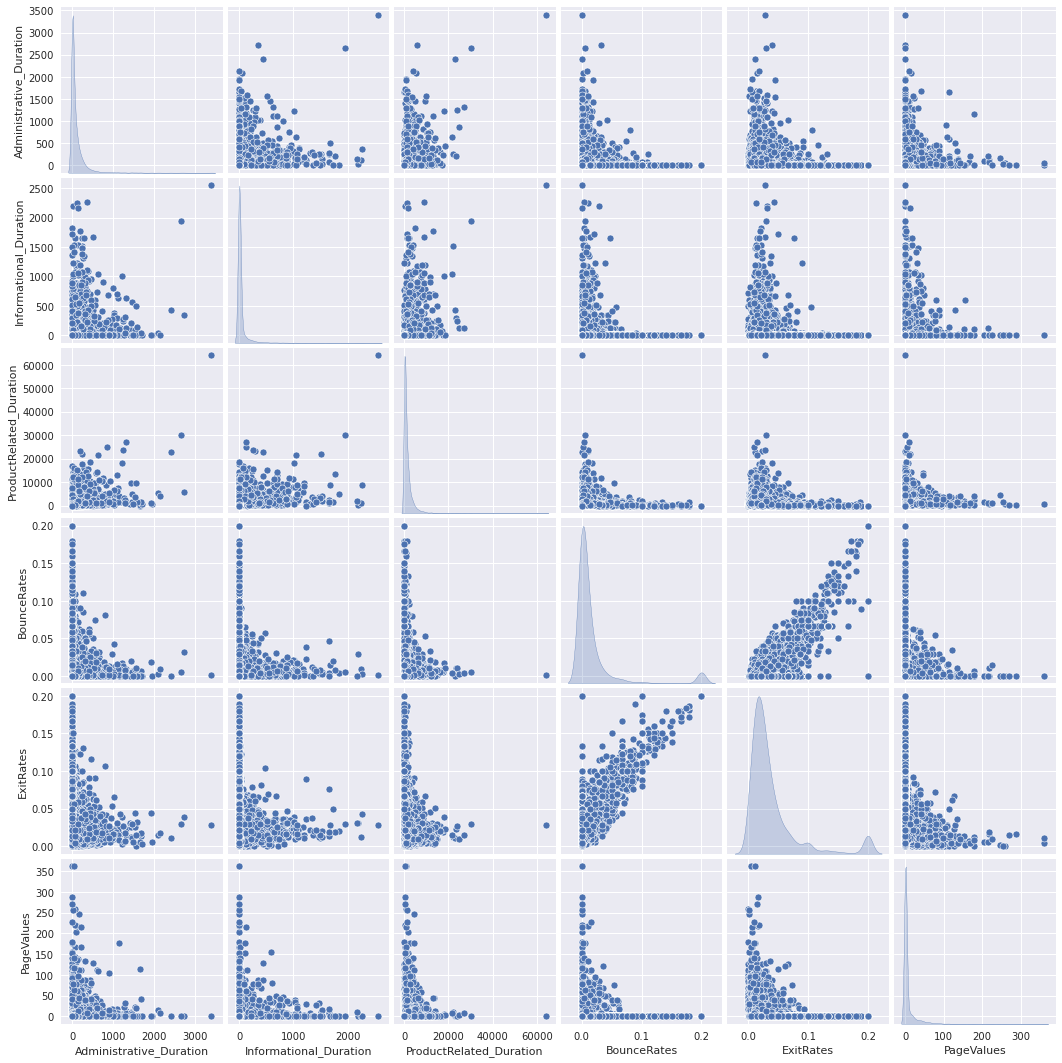

In [48]:
sns.pairplot(recomb_train[[
                        'Administrative_Duration', 
                        'Informational_Duration', 
                        'ProductRelated_Duration',
                        'BounceRates',
                        'ExitRates',
                        'PageValues']], diag_kind='kde')

There is a linear correlation between `BounceRates` and `ExitRates`. 

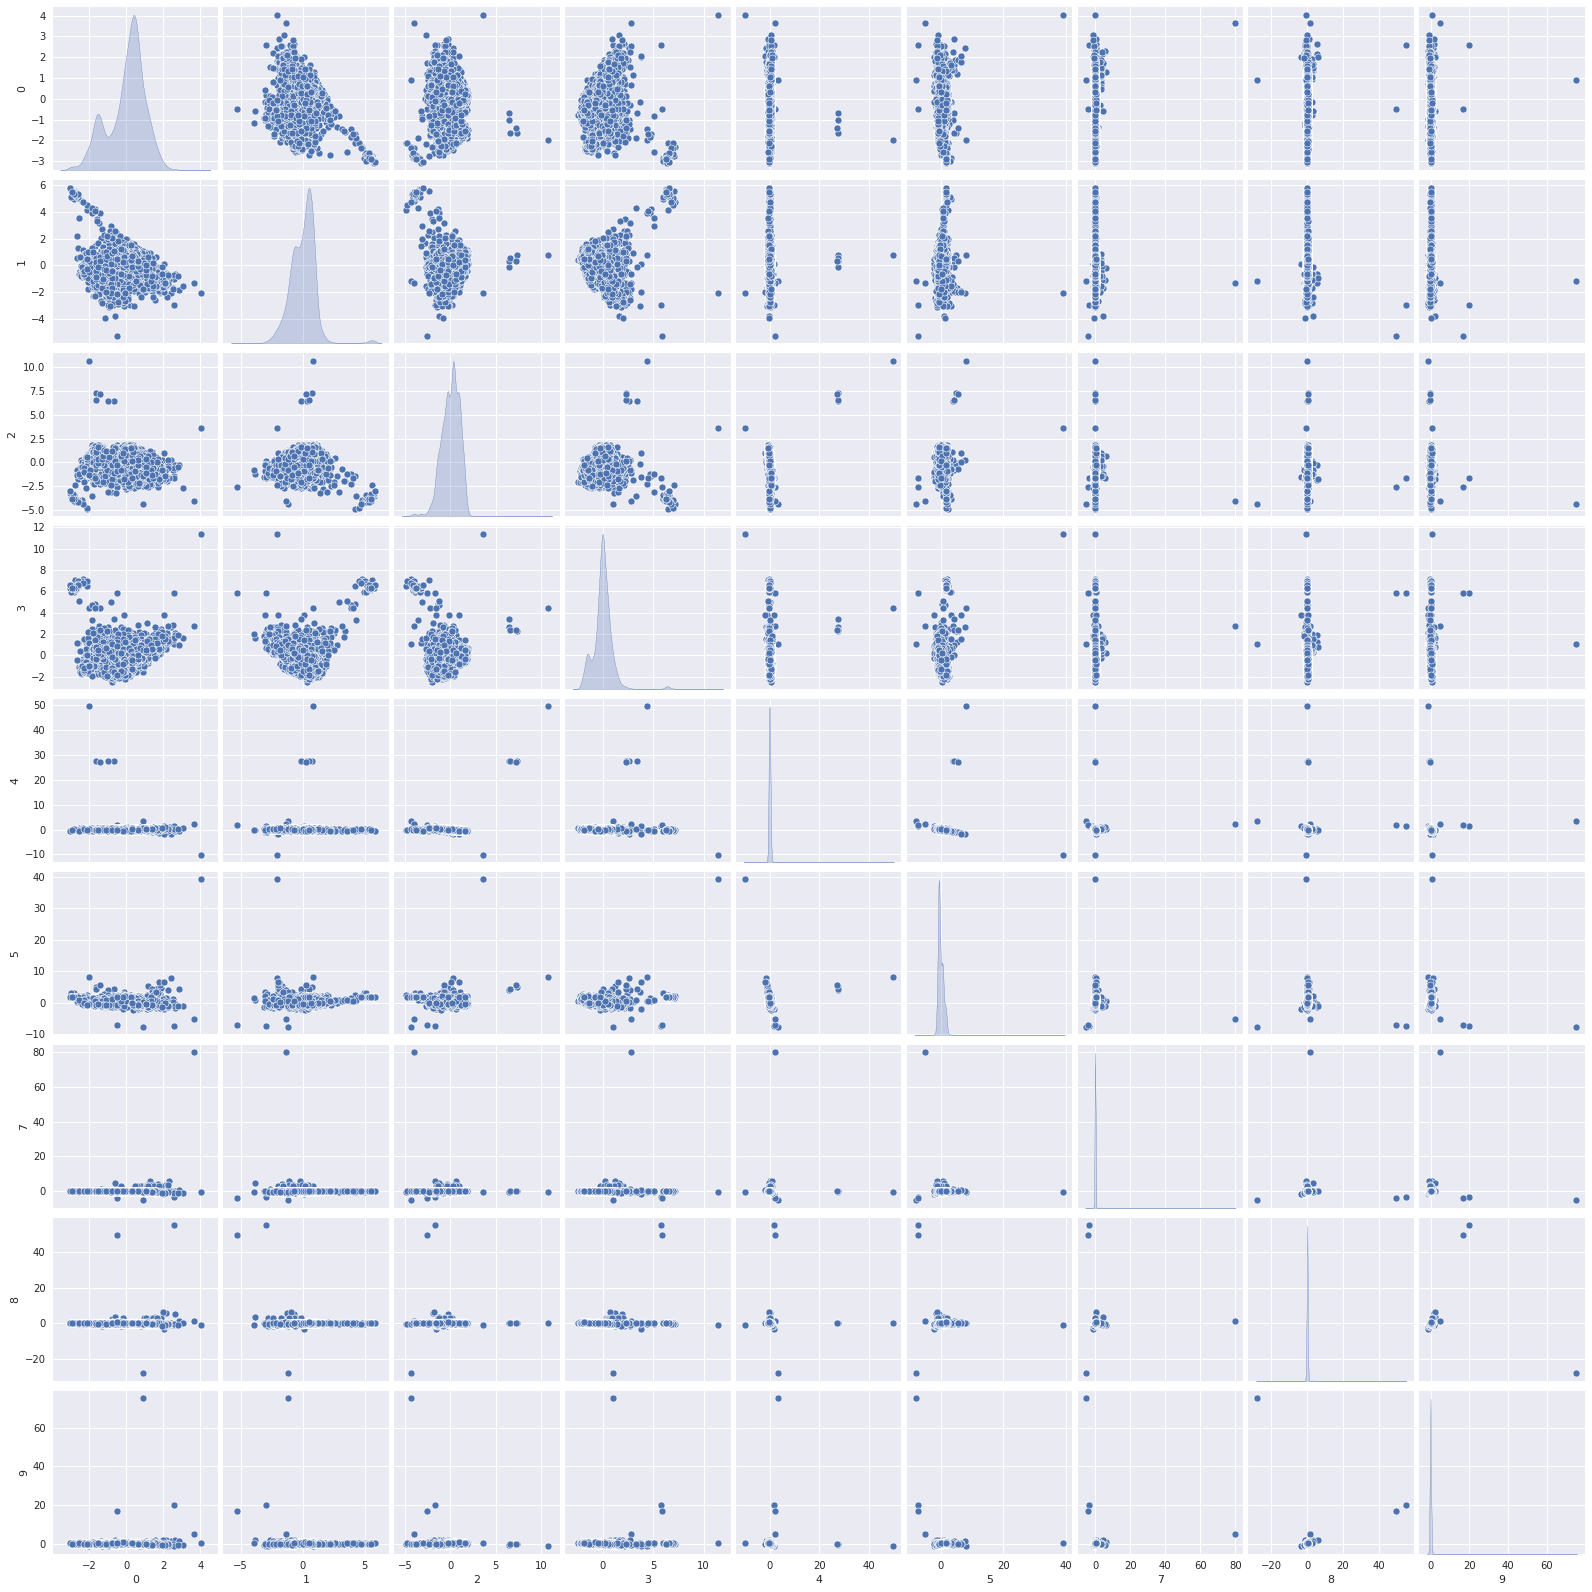

In [49]:
sns.pairplot(recomb_train[[ 
                        0, 
                        1,
                        2,
                        3,
                        4, 
                        5,
                        7,
                        8,
                        9]], diag_kind='kde')

It looks like it may be possible to reduce the dimensions of the variables by removing one of the correlated variables in the variable pair `BounceRates` & `ExitRates`. 

Checking a heatmap for verification that one variable in the pairs can be removed.

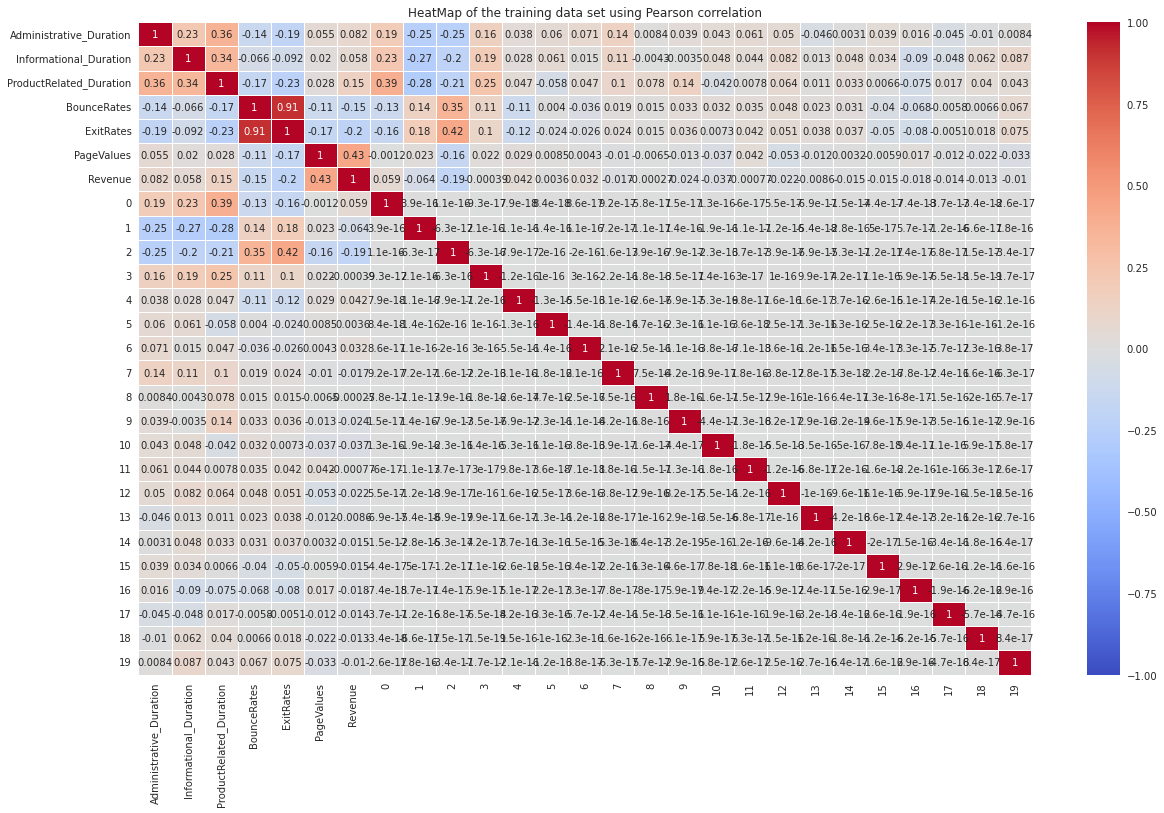

In [50]:
plt.figure(figsize=(20,12))
heat_map = sns.heatmap( recomb_train.corr('pearson'), annot = True, vmin=-1, vmax=1, linewidths=.5, cmap = 'coolwarm')
plt.title( "HeatMap of the training data set using Pearson correlation" )
plt.show()

The heatmap confirms that `BounceRates` & `ExitRates` are correlated 91% of the time and one can be dropped. 


Dropping `BounceRates`.

In [51]:
recomb_train.drop(['BounceRates', 'ProductRelated_Duration'], inplace = True, axis = 1)
recomb_test.drop(['BounceRates', 'ProductRelated_Duration'], inplace = True, axis = 1)

Checking the shape of the train and test sets.

In [52]:
print('Train set shape: ', recomb_train.shape)
print('Test set shape: ', recomb_test.shape)

Train set shape:  (6875, 25)
Test set shape:  (2091, 25)


Separating out target variable.

In [53]:
y_train = recomb_train[['Revenue']]
X_train = recomb_train.drop(columns='Revenue')

y_test = recomb_test[['Revenue']]
X_test = recomb_test.drop(columns='Revenue')

In [55]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print()
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (6875, 24)
y_train shape:  (6875, 1)

X_test shape:  (2091, 24)
y_test shape:  (2091, 1)


Using `StanderScaler`.

Fitting the `StandarScaler` to the train set. Applying to both the train and test set.

In [56]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X_train)

/home/cim/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


StandardScaler()

In [57]:
Xs_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Xs_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

/home/cim/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/cim/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Checking that the scaling is sufficient.

In [ ]:
Xs_train

In [58]:
Xs_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative_Duration,2091.0,-0.131307,0.904273,-0.490464,-0.490464,-0.490464,-0.144539,10.574990
Informational_Duration,2091.0,-0.075508,0.741272,-0.256217,-0.256217,-0.256217,-0.256217,9.149633
ExitRates,2091.0,0.183218,1.207740,-0.866355,-0.572676,-0.300196,0.302988,3.593701
PageValues,2091.0,-0.150332,0.669863,-0.329683,-0.329683,-0.329683,-0.329683,12.381378
0,2091.0,-0.076878,0.862042,-2.464911,-0.470653,0.139248,0.465894,2.221393
1,2091.0,0.071452,0.750736,-2.706707,-0.524151,0.257704,0.689089,1.767931
2,2091.0,0.360001,0.901168,-2.669615,-0.218889,0.474999,1.054164,5.105920
3,2091.0,-0.085129,0.616088,-2.128766,-0.357434,-0.025365,0.276792,1.967830
4,2091.0,-0.055635,0.718134,-0.756418,-0.255770,-0.093094,0.101739,21.546308
5,2091.0,-0.131109,0.790305,-1.504748,-0.698270,-0.404336,0.370193,5.244361


In [59]:
Xs_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative_Duration,6875.0,1.851610e-15,1.000073,-0.490464,-0.490464,-0.371552,0.092203,17.880028
Informational_Duration,6875.0,5.771545e-16,1.000073,-0.256217,-0.256217,-0.256217,-0.256217,16.089412
ExitRates,6875.0,5.730075e-15,1.000073,-0.870274,-0.562268,-0.329549,0.078003,3.593701
PageValues,6875.0,-4.386955e-16,1.000073,-0.329683,-0.329683,-0.329683,-0.329683,17.255610
0,6875.0,-5.425963e-18,1.000073,-3.070809,-0.553756,0.214322,0.647664,4.046142
1,6875.0,-1.590647e-17,1.000073,-5.277414,-0.648698,0.115162,0.615895,5.827526
2,6875.0,4.218040e-17,1.000073,-4.860648,-0.646608,0.128712,0.754257,10.728494
3,6875.0,1.304492e-16,1.000073,-2.466007,-0.420370,-0.001812,0.428134,11.417997
4,6875.0,-2.460456e-17,1.000073,-10.033819,-0.222432,-0.035502,0.159542,49.486010
5,6875.0,-1.776357e-17,1.000073,-7.933304,-0.628781,-0.243519,0.561287,39.218819


In [60]:
y_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,2091.0,0.093257,0.290862,0.0,0.0,0.0,0.0,1.0


In [61]:
y_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,6875.0,0.196073,0.397053,0.0,0.0,0.0,0.0,1.0


### Creating a logistic regression model for the data.

In [66]:
log_model = LogisticRegression(C = 100, penalty='l1', class_weight='balanced', 
                               solver = 'saga', 
                               random_state=random_seed)

In [67]:
log_model.fit(Xs_train, validation.column_or_1d(y_train))

/home/cim/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/cim/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100, class_weight='balanced', penalty='l1',
                   random_state=42, solver='saga')

Exploring results of the logistic regression.

In [68]:
y_pred = log_model.predict(Xs_test)
y_pred_prob = log_model.predict_proba(Xs_test)

# Accuracy
print('Training accuracy: %.4f' % accuracy_score(y_test, y_pred))
# Classification report
print("Classification report: \n", classification_report(y_test, y_pred))
# Confusion Matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Training accuracy: 0.9220
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1896
           1       0.55      0.89      0.68       195

    accuracy                           0.92      2091
   macro avg       0.77      0.91      0.82      2091
weighted avg       0.95      0.92      0.93      2091

Confusion matrix:
 [[1754  142]
 [  21  174]]


/home/cim/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/cim/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


#### Intepreting the results.

In [65]:
feature_names = Xs_train.columns.tolist()

X_lime = np.vstack(Xs_train.to_numpy())

# Instantiating the explainer object by passing in the training set, and the 
# extracted features
ex_lime = lime_tabular.LimeTabularExplainer(X_lime, mode = 'classification', 
                                            feature_names = feature_names, 
                                            verbose = True)

idx = random.randint(0, len(Xs_test)-1) # random index

print('Random index: ', idx)
print("Prediction : ", y_pred[idx])
print("Actual :     ", y_test.iloc[idx])

explained_rand = ex_lime.explain_instance(np.vstack(Xs_test.to_numpy())[idx], 
                                          log_model.predict_proba, 
                                          num_features = 15)
explained_rand.show_in_notebook()

Random index:  349
Prediction :  0.0
Actual :      Revenue    0
Name: 349, dtype: int64
Intercept 0.7967515742145672
Prediction_local [0.325]
Right: 0.2932713477582908


Looking at an instance of incorrect prediction.

In [ ]:
idx = 1458 # index is incorrect prediction

print('Index: ', idx)
print("Prediction : ", y_pred[idx])
print("Actual :     ", y_test.iloc[idx])

explained_incorrect = ex_lime.explain_instance(np.vstack(Xs_test.to_numpy())[idx], 
                                               log_model.predict_proba, 
                                               num_features = len(Xs_test.columns))
explained_incorrect.show_in_notebook()

Looking at an instance where the model correctly predicts `Revenue` is false.

In [ ]:
idx = 66 # index is correctly predicted as 0

print('Index: ', idx)
print("Prediction : ", y_pred[idx])
print("Actual :     ", y_test.iloc[idx])

explained_0 = ex_lime.explain_instance(np.vstack(Xs_test.to_numpy())[idx], 
                                       log_model.predict_proba, 
                                       num_features = len(Xs_test.columns))

explained_0.show_in_notebook()

Looking at an instance where the model correctly predicts `Revenue` is true.

In [ ]:
idx = 65 # index is correctly predicted as 1

print('Index: ', idx)
print("Prediction : ", y_pred[idx])
print("Actual :     ", y_test.iloc[idx])

explained_1 = ex_lime.explain_instance(np.vstack(Xs_test.to_numpy())[idx], 
                                       log_model.predict_proba, 
                                       num_features = len(Xs_test.columns))

explained_1.show_in_notebook()

### Creating a 2nd classification model - random forest.

In [ ]:
print(f'Featue names: {feature_names}')

rf_model = RandomForestClassifier(random_state = random_seed, 
                                  n_estimators = 100)
rf_model.fit(X_train, validation.column_or_1d(y_train))

y_pred_rf = rf_model.predict(Xs_test)
y_pred_prob_rf = rf_model.predict_proba(Xs_test)

# Accuracy
print('Training accuracy: %.4f' % accuracy_score(y_test, y_pred_rf))
# Classification report
print("Classification report: \n", classification_report(y_test, y_pred_rf))
# Confusion Matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred_rf))

In [ ]:
idx = 65 # index is incorrectly predicted as 0

print('Index: ', idx)
print("Prediction : ", y_pred_rf[idx])
print("Actual :     ", y_test.iloc[idx])

explained_1 = ex_lime.explain_instance(np.vstack(Xs_test.to_numpy())[idx], 
                                       rf_model.predict_proba, 
                                       num_features = len(Xs_test.columns))

explained_1.show_in_notebook()

In [ ]:
idx = 66 # index is correctly predicted as 0

print('Index: ', idx)
print("Prediction : ", y_pred_rf[idx])
print("Actual :     ", y_test.iloc[idx])

explained_0 = ex_lime.explain_instance(np.vstack(Xs_test.to_numpy())[idx], 
                                       rf_model.predict_proba, 
                                       num_features = len(Xs_test.columns))

explained_0.show_in_notebook()

In [ ]:
# rf_model = RandomForestClassifier(random_state = random_seed, 
#                                   n_estimators = 100)
# rf_model.fit(X_train, validation.column_or_1d(y_train))

# y_pred_rf = rf_model.predict(Xs_test)
# y_pred_prob_rf = rf_model.predict_proba(Xs_test)
feature_rf_names = X_train.columns
imp_features = rf_model.feature_importances_

# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], 
               axis=0) 
rf_model_importances = pd.Series(imp_features, index = feature_rf_names)

fig, ax = plt.subplots()
rf_model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("")
fig.tight_layout()

### Take aways 

From looking at the feature importance in the model with LIME, it appears that import features in predicting the outcome in both models are `PageValues` and `ExitRates` for almost all of the sample cases  with the two models.

#### For the logistic regression model.
The logistic regression model is not a great model. The benchmark positive rate can be seen in the mean of the train and test set of ~0.2 and ~0.1 respectively for predicting a sale. 

The model has excellent precision at 98% (as weel as recall and f1-score) for `Revenue == False (0 row)` as 80 to 90 percent of the data is the `Revenue == False` so the high numbers in the `Revenue == False` row are not useful for detemining if the model is useful.

The `Revenue == True (1 row)` is a better metric for judging the model. The precision of 65% reflects the bottom row in the confusion matrix. It is corectly predicting the `Revenue == True` a decent amount of the time, but it's not great. This is also reflected in the f1-score of 74%. Again, this is decent, but ideally we would want our model to perform much better.

### For the random forest model

The random forest classifier performed here is pretty __awful__. While it looks line the precision is better than the logistic regression model, the actual number of correct predicts for `Revenue == True` are worse.

##  Task 2. Customer Segmentation (25 points)

Generate user-behavior clusters based on the purchasing behavior data for the complete dataset. 

1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
2. Return plots and cluster images generated for the data.
3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.).

Point breakdown:

- (15 points) Clustering code
- (10 points) Clustering analysis

Clustering the data.

In [ ]:
# starting with the complete dataset data_onehot, removing columns already decided were unhelpful, and scaling 
print('Raw data shape: ', rawdata.shape, '\nColumns: ', rawdata.columns)
print('One hot encoded data shape: ', data_onehot.shape, '\nColumns: ', data_onehot.columns)

In [ ]:
y_kmeans = data_onehot['Revenue']
X_kmeans = data_onehot.drop(columns=['BounceRates', 'ProductRelated_Duration', 'Month'], axis = 1)

In [ ]:
print('\n\nX_kmeans data shape: ', X_kmeans.shape, '\nColumns: ', X_kmeans.columns)
print('y_kmeans data shape: ', y_kmeans.shape)

In [ ]:
y_km_df = pd.DataFrame(y_kmeans.to_numpy(), columns = ['Cluster'])

In [ ]:
## Trying something from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
# literally typing in code with edits. 
# X_kmeans # data
# y_km_df # labels
# I don't want to set the number of clusters
# - I want the code to do that, I'll put it in a loop shortly

# n_clust = 2

#####################################################################################################

def bench_k_means(kmeans, name, data, labels):

    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    results = [name, estimator[-1].inertia_]

    cluster_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score
    ]
    results += [m(labels, estimator[-1].labels_) for m in cluster_metrics]

    # Silhouette score
    results += [ 
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric = 'euclidean',
            sample_size = 300
        )
    ]

        # Show the results
    formatter_result = (
        "{:9s}\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

#####################################################################################################


In [ ]:
# from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
# literally typing in code with slight edits. 
def print_kmeans_stats(n_clusters, data, labels):

    (n_samples, n_features) = data.shape

    print(f"# clusters: {n_clusters}; # samples: {n_samples}; # features {n_features}")

    print(82 * "_")
    print("init\t\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

    kmeans = KMeans(init = "k-means++", n_clusters = n_clusters, n_init = 1, 
                    random_state = random_seed)
    bench_k_means(kmeans = kmeans, name = "k-means++", data = data, 
                  labels = labels)

    kmeans = KMeans(init = "random", n_clusters = n_clusters, n_init = 1, 
                    random_state = random_seed)
    bench_k_means(kmeans = kmeans, name = "random", data = data, 
                  labels = labels)

    pca = PCA(n_components = n_clusters).fit(data)
    kmeans = KMeans(init = pca.components_, n_clusters = n_clusters, n_init = 1)
    bench_k_means(kmeans = kmeans, name = "PCA-based", data = data, 
                  labels = labels)

    print(82 * "_")

Plotting - the reason I wanted to try this example.

In [ ]:
def plot_cluster_anal(n_clust, start_ind, stop_ind, data, labels):
    # This copy and pasted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
    # with slight editting

    reduced_data = PCA(n_components = 2).fit_transform(data) ## for plotting
    kmeans = KMeans(init = "k-means++", n_clusters = n_clust, n_init = 1)
    kmeans.fit(reduced_data)

    ## Plotting rows between start_ind and stop_ind
    # reduced_data = reduced_data[start_ind:stop_ind]
    # reduced_label = labels[start_ind:stop_ind]
    reduced_label = labels

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 10  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation = "nearest",
        extent = (xx.min(), xx.max(), yy.min(), yy.max()),
        cmap = plt.cm.Paired,
        aspect = "auto",
        origin = "lower",
    )

    # plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c = reduced_label, marker = "x")
    # Plot the centroids as a red X
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker = ".",
        s=50,
        linewidths = 1,
        color = "red",
        zorder = 10,
    )
    plt.title(
        "K-means clustering on sales data set (PCA-reduced data)\n"
        "Centroids are marked with white cross"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [ ]:
# range with rows where 'Revenue' = 1 : 95 - 125

n_start = 95
n_stop = 106

for nc in range(2,6):
    plot_cluster_anal(nc, n_start, n_stop, X_kmeans, y_kmeans)
    print_kmeans_stats(nc, X_kmeans, y_kmeans)

In [ ]:
# range with rows where 'Revenue' = 1 : 95 - 125

n_start = 95
n_stop = 126

for nc in range(2,6):
    plot_cluster_anal(nc, n_start, n_stop, X_kmeans, y_kmeans)
    print_kmeans_stats(nc, X_kmeans, y_kmeans)

Creating an elbow plot to chose the best number of clusters.

In [ ]:
stat_elbow = []

df_elbow = pd.DataFrame()
name = "random"
# ['k-means++', 'random', 'PCA-based']
n_clusters = 2
print(n_clusters)

for num in range(2, 15):
    kmeans = KMeans(init = name, n_clusters = num, n_init = 1, 
                    random_state = random_seed)
    estimator = make_pipeline(StandardScaler(), kmeans).fit(X_kmeans)
    results = [name, estimator[-1].inertia_]

    # Silhouette score
    results += [ 
    metrics.silhouette_score(
        X_kmeans,
        estimator[-1].labels_,
        metric = 'euclidean',
        sample_size = 300
    )
    ]

    df = pd.DataFrame([*results])
    df = df.T
    df.columns = ['name', 'inertia', 'silhouette',]
    
    df_temp = pd.DataFrame()
    df_temp['num_clust'] = [num]
    df_temp['name'] = df['name']
    df_temp['inertia'] = df['inertia']
    df_temp['silhouette'] = df['silhouette']

    df_elbow  = df_elbow.append(df_temp)

# df_elbow = df_temp

print("\n\n\n\n\n", df_elbow)

plt.plot(range(2,15), df_elbow['inertia'][:])
plt.title('name')
plt.show()



In [ ]:
'''
# range with rows where 'Revenue' = 1 : 95 - 125

n_start = 95
n_stop = 146

for nc in range(2,6):
    plot_cluster_anal(nc, n_start, n_stop, X_kmeans, y_kmeans)
    print_kmeans_stats(nc, X_kmeans, y_kmeans)
'''

In [ ]:

'''
Turned this into a loop
# n_clust = 2 ## want to make this a loop *****

for n_digits in range(2,16):
    print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

    print(82 * "_")
    print("init\t\t\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

    kmeans = KMeans(init = "k-means++", n_clusters = n_digits, n_init = 1, random_state = random_seed)
    bench_k_means(kmeans = kmeans, name = "k-means++", data = X_kmeans, labels = y_kmeans)

    kmeans = KMeans(init = "random", n_clusters = n_digits, n_init = 1, random_state = random_seed)
    bench_k_means(kmeans = kmeans, name = "random", data = X_kmeans, labels = y_kmeans)

    pca = PCA(n_components = n_digits).fit(X_kmeans)
    kmeans = KMeans(init = pca.components_, n_clusters = n_digits, n_init = 1)
    bench_k_means(kmeans = kmeans, name = "PCA-based", data = X_kmeans, labels = y_kmeans)

    print(82 * "_")
    '''

In [ ]:
'''

# This copy and pasted from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
# with slight editting

n_digits = 2 ## want to make this a loop *****

reduced_data = PCA(n_components = 2).fit_transform(X_kmeans) ## for plotting
kmeans = KMeans(init = "k-means++", n_clusters = n_digits, n_init = 1)
kmeans.fit(reduced_data)

## Plotting 10 points
reduced_data = reduced_data[60:71]
reduced_label = y_kmeans[60:71]

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation = "nearest",
    extent = (xx.min(), xx.max(), yy.min(), yy.max()),
    cmap = plt.cm.Paired,
    aspect = "auto",
    origin = "lower",
)

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c = reduced_label, marker = "x")
# Plot the centroids as a red X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker = ".",
    s=50,
    linewidths = 1,
    color = "red",
    zorder = 10,
)
plt.title(
    "K-means clustering on sales data set (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
'''

## Task 3. Semi-Supervised Learning (15 points)
Consider you have training data with the `Revenue` attribute for records from June—September only. For all records from **October—December**, however, `Revenue` attribute is missing. Build a **semi-supervised self-labeling model** to estimate `Revenue` for the missing records in **October—December** and then fit your classifier. Report classification performance on **February—March** data set with and **without the self-labeled data**.

1. If you do not consider the records from October—December, generate the classification performance on test data
2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

Point breakdown:

- ( 2 points) Correctly splits the data by month into labeled, unlabeled, and test 
- (8 points) Generate labels for unlabeled samples with a self labeling technique
- (5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels

## Style and clarity (10 points). 
Write clear, readable, well-commented code following [PEP8](https://peps.python.org/pep-0008/); also include explanations in markdown cells, where appropriate. 

# Deliverables:
- Code in a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells) of what is being done and why.